In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from .. import asimovgw
from astropy.cosmology import Planck15
import icarogw

ImportError: attempted relative import with no known parent package

## The match-by-eye statistical approach

$$ p(\varphi_j|\{x\})=\int d\Lambda p(\Lambda|\{x\}) \int dN_{\rm exp} d\theta p(N_{\rm exp}|\Lambda)p(\theta|\Lambda)p(\varphi|N_{\rm exp},\theta)$$

$$ p(\varphi_j|\{x\})=\int d\Lambda p(\Lambda|\{x\}) \int d\theta p(N_{\rm exp}|\Lambda)p(\theta|\Lambda)p(\varphi|N_{\rm exp}(\Lambda),\theta)$$


$$p(\varphi_h|N_{\rm exp},\theta)=\frac{p(N_{\rm exp}(\Lambda)|\Lambda)p(\theta|\varphi_j)p(\varphi_j)}{\sum_j p(N_{\rm exp}(\Lambda)|\Lambda)p(\theta|\varphi_j)p(\varphi_j)}$$

In [ ]:
import daft
pgm = daft.PGM()

pgm.add_node(daft.Node('data', r'$\{x\}$', 0., 1.75,observed=True))
pgm.add_node(daft.Node('lambda', r'$\Lambda$', 1.0, 1.75))
pgm.add_node(daft.Node('theta', r'$\theta$', 2.0, 1.75-0.4))
pgm.add_node(daft.Node('N', r'$N_{\rm exp}$',2.0, 1.75+0.4))
pgm.add_node(daft.Node('phi', r'$\varphi$', 3.0, 1.75))


pgm.add_edge('data','lambda')
pgm.add_edge('lambda','theta')
pgm.add_edge('lambda','N')
pgm.add_edge('N','phi')
pgm.add_edge('theta','phi')
pgm.render()

# Functionality of ASIMOVGW

In this notebook we show some of the functionalities of asimovGW.

## Rapresenting syntehtic populations: 

Synthetic populations are hosted in the synthethic_population object that can be used to perform several taks.

### Example with a trivial population

We wll show how the code works using two populations that does not overlap at all in the parameter space. We generate two populations in masses and redshift. Model_0 will be distribuited between 0 and 1 uniformly, while Model_1 will be distribuited between -1 and 0 uniformly


In [2]:
bins={'mass_1_source':40,'mass_2_source':40}


# Defines the dictionary for a population in mass_1_source, mass_2_source and redshift distribuited uniform
popbin={'mass_1_source':{'values':np.random.rand(10000),'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':np.random.rand(10000),'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        #'redshift': {'values':np.random.rand(10000),'tex_label':r'$z$','tex_var':r'z'}
       }

# Define the population called model_0, here we will assume that the total number of binaries is 1e6
# The prior_to_rem is only used when interacting with posteriors from real event
# We will set a prior on the model 1 (it is normalized later)
pop_1=asimovgw.synthetic_population.synthetic_population('model_0',1e6,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=1.)

# Select all the binaries with detected mass lower than 0.9
idx_det=np.where(pop_1.binary_params['mass_1_source']['values']<=0.9)[0]
# Apply the selection cut
pop_1.apply_selection_cut(ilabel_det=idx_det)

# Defines the second population
popbin={'mass_1_source':{'values':np.random.rand(10000)-1.0,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':np.random.rand(10000)-1.0,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        #'redshift': {'values':np.random.rand(10000)-1.0,'tex_label':r'$z$','tex_var':r'z'}
       }

# Same as above initializing the second population and its selection cut
pop_2=asimovgw.synthetic_population.synthetic_population('model_1',1e6,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=1.)
idx_det=np.where(pop_2.binary_params['mass_1_source']['values']<=2.)[0]
pop_2.apply_selection_cut(ilabel_det=idx_det)

NameError: name 'asimovgw' is not defined

In [3]:
# We show histograms of the astrophysical (black) and detected (red) population for model_0
fig=pop_1.histogram_astrophysical_population(hist_kwargs={'density':True})
fig=pop_1.histogram_detected_population(fig=fig,hist_kwargs={'density':True},color='red')

NameError: name 'pop_1' is not defined

In [4]:
# We can also define a list of populations, this is used to perform several actions 
# that relates all 
listofpop=asimovgw.synthetic_population.list_of_populations([pop_1,pop_2])

# We now calculate the probability of any given model given a set of parameters
# This will also initialize a common grid among all the simulations, we are passing the bins
listofpop.calculate_log_pmodel_given_theta({'mass_1_source':20,'mass_2_source':20})

NameError: name 'asimovgw' is not defined

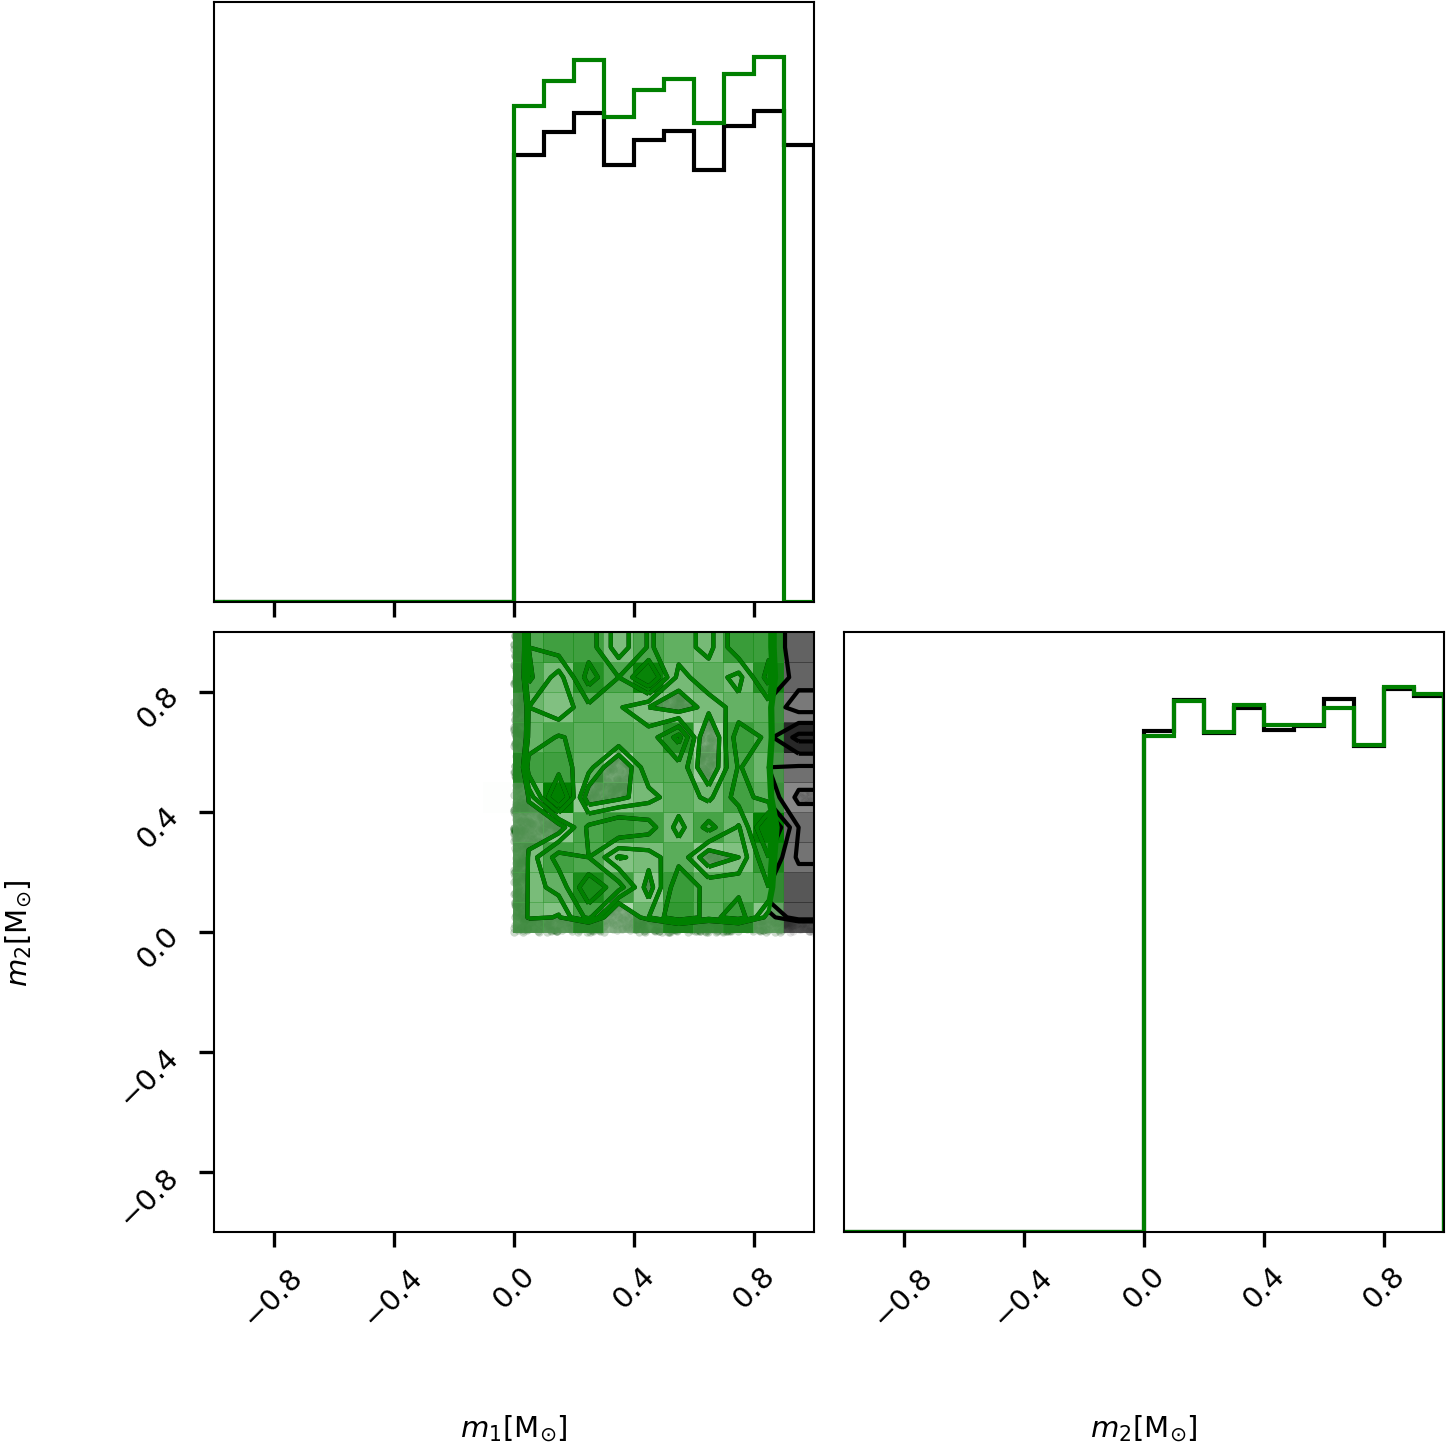

In [24]:
# Again some plotting for the model_o to check how the histogram procedure is working
fig=listofpop.plot_histograms_astrophysical('model_0',hist_kwargs={'density':True})
fig=listofpop.plot_histograms_detected('model_0',hist_kwargs={'density':True},color='green',fig=fig)

/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:84: RuntimeWarning: divide by zero encountered in log
  norm_factor.append(_np.log(self.population_list[key].p_model_given_theta)+_np.log(self.population_list[key].prior_model)+logNpart)
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:86: RuntimeWarning: divide by zero encountered in log
  self.population_list[key].log_p_model_given_theta=_np.log(self.population_list[key].p_model_given_theta)+_np.log(self.population_list[key].prior_model*_np.exp(logNpart))
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:95: RuntimeWarning: invalid value encountered in subtract
  self.population_list[key].log_p_model_given_theta-=log_norm_factor
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:101: RuntimeWarning: divide by zero encountered in log
  self.log_p_null_model_given_theta=_np.log(self.p_null_model_given_theta)
/home/simone/git_repositories/asimovgw/asi

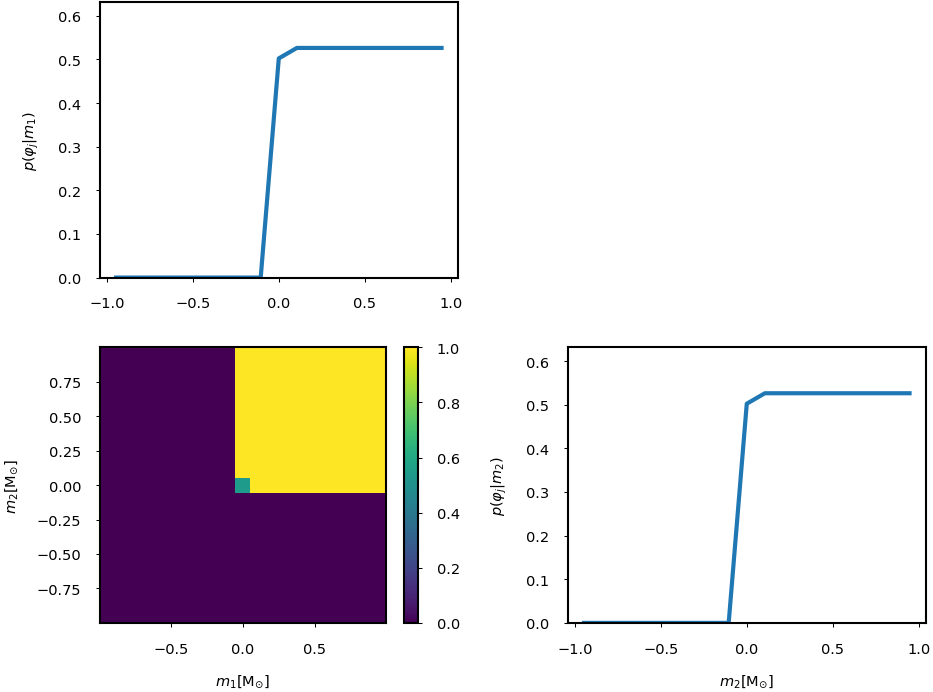

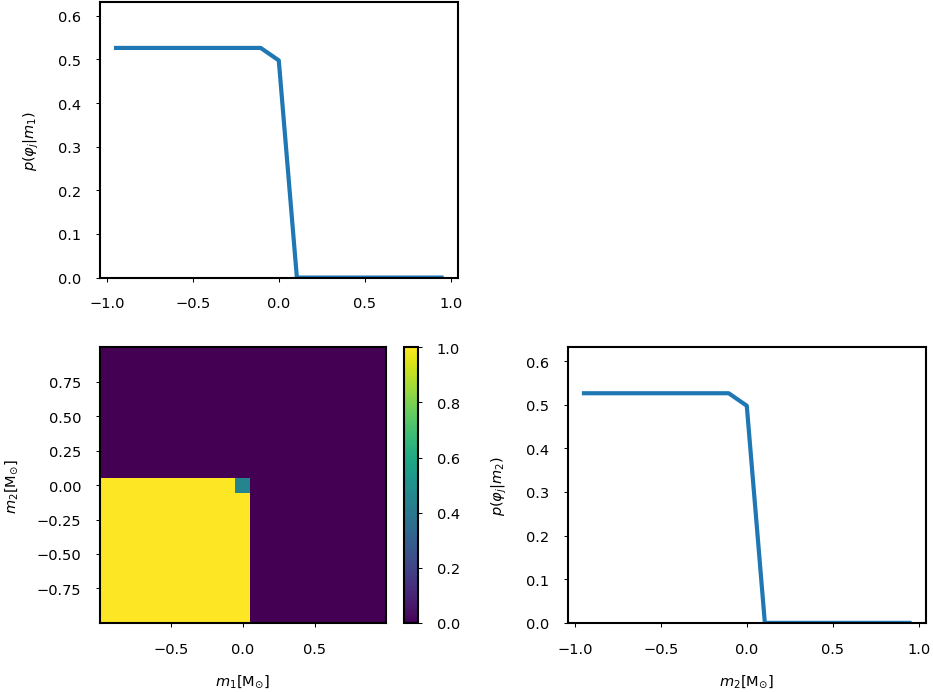

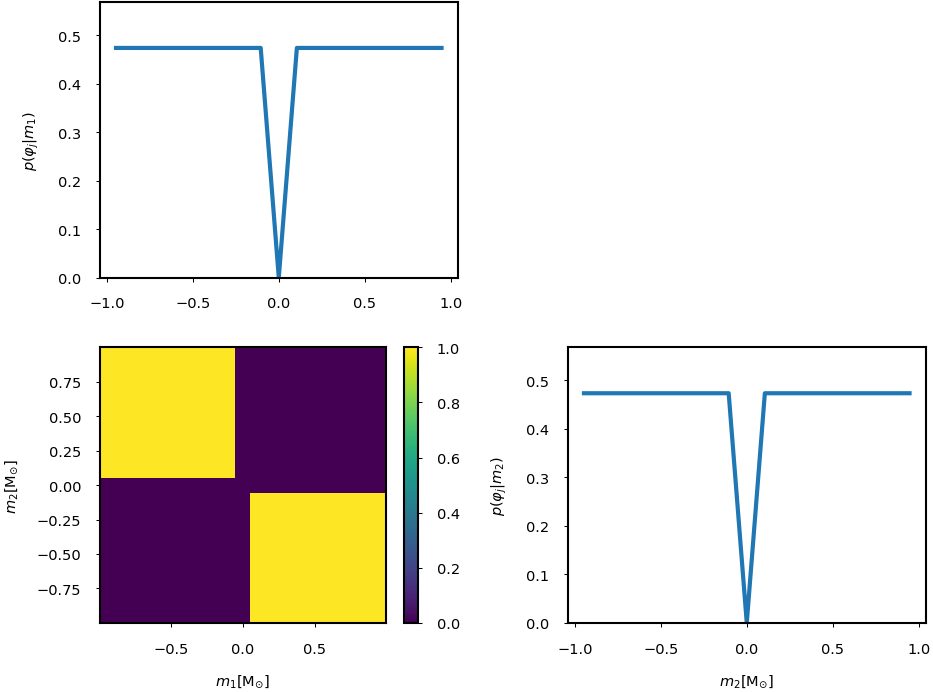

In [25]:
# We can also decide to plot the corner plots of p(phi|variables) to check if we like the binning
# You can clearly see the meaning of p(phi|variables), when we are in a point of the parameter space
# Supported just by one population, the p(phi|variables) is one. Note that we also define the null probability
# i.e. that region in the parameter space does not have support in any of the models
fig=listofpop.plot_pmodel_given_theta('model_0',bins={'mass_1_source':20,'mass_2_source':20})
fig=listofpop.plot_pmodel_given_theta('model_1',bins={'mass_1_source':20,'mass_2_source':20})
fig=listofpop.plot_pmodel_given_theta('null',bins={'mass_1_source':20,'mass_2_source':20})

### Calculating the overlap

Given an inferred phenomenological population, we can compute the overlap of a model as 

$$ p(\varphi_j|\{x\})=\int d\Lambda p(\Lambda|\{x\}) \int d\theta p(N_{\rm exp}|\Lambda)p(\theta|\Lambda)p(\varphi|N_{\rm exp}(\Lambda),\theta)$$

In [27]:
# Let us assume that we have managed to get the correct population and that the correct model is model_0
# from phenomenological models, we generate samples from it
phenom_dict_1={'mass_1_source':np.random.rand(10000),
               'mass_2_source':np.random.rand(10000)}

listofpop.calculate_phehom_match([phenom_dict_1],bins={'mass_1_source':20,'mass_2_source':20})

# You can see that the probability of model_0 is very high.

{'model_0': 0.9981491228070173,
 'model_1': 0.0015508771929824544,
 'null': 0.0003000000000003}

Another way in which you can interpret the probabilities is the following: The ratio of two p(varphi_j) is basically how much more model_0 overlaps to the phenom population w.r.t. model_1

In [30]:
# Now we generate a population which is in the middle of model_0 and model_1, basically 1/4 and 1/4 in model_0 and
# model_1 and the rest in the null hypothesis
phenom_dict_1={'mass_1_source':np.random.rand(10000)-0.5,
               'mass_2_source':np.random.rand(10000)-0.5}

listofpop.calculate_phehom_match([phenom_dict_1],bins={'mass_1_source':30,'mass_2_source':30})

# You can see that more or less 30% and 30% is in model _0 and model_1 and the rest is in null. 
# There is a bit of overlap given the discritized binning (you can reduce it decreasing the binning size)
# You can see that the null contains more or less 2 times the binaries that contains model_0 and model_1

{'model_0': 0.28924999999999984,
 'model_1': 0.28584999999999966,
 'null': 0.4249000000000005}

## A GW example

Let us now perform the computation above with a more concrete GW example. We will generate three populations in source masses and redshift. We will make use of [icarogw](https://pypi.org/project/icarogw/) to quickly generage posterior samples

In [31]:
import icarogw
variabels=['mass_1_source','mass_2_source','redshift']
bins={'mass_1_source':20,'mass_2_source':20,'redshift':20}
# Rate and Tobs to compute the total number of detections. These are just some random numbers
# To get sim 100 binaries detected with the selection cut we are going to apply
R0=20
Tobs=.1

# We will detect any binary below redshift 0.5
zcut=0.5

In [46]:
## Defines the mass and redshift distribution for our model_0
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.1})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})

## Draws masses and redshift values and compute the total number of detections
m1s,m2s=true_mass_distro.sample(50000)
zs=true_redshift_distro.sample(50000)
zlim=np.linspace(0,1,10000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

# initialize the population dictionary
popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

# Initialize the population
pop_0=asimovgw.synthetic_population.synthetic_population('model_0',Ntotal,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=Tobs)
# Apply selection cut
idx_det=np.where(pop_0.binary_params['redshift']['values']<=zcut)[0]
pop_0.apply_selection_cut(ilabel_det=idx_det)


########### Below do the same as above defining two other population. 
# One is a truncated PL the otherwone a powerlaw gaussian with a stronger gaussian peak

true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw',hyper_params_dict={'mmin':5, 'mmax':45,'alpha':1.5,
                                                                         'beta':1.})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(50000)
zs=true_redshift_distro.sample(50000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0
popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}
pop_1=asimovgw.synthetic_population.synthetic_population('model_1',Ntotal,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=Tobs)
idx_det=np.where(pop_1.binary_params['redshift']['values']<=zcut)[0]
pop_1.apply_selection_cut(ilabel_det=idx_det)


true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35+10,'sigma_g':5.,
                                                                         'lambda_peak':0.2})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(50000)
zs=true_redshift_distro.sample(50000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_2=asimovgw.synthetic_population.synthetic_population('model_2',Ntotal,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=Tobs)

idx_det=np.where(pop_2.binary_params['redshift']['values']<=zcut)[0]
pop_2.apply_selection_cut(ilabel_det=idx_det)



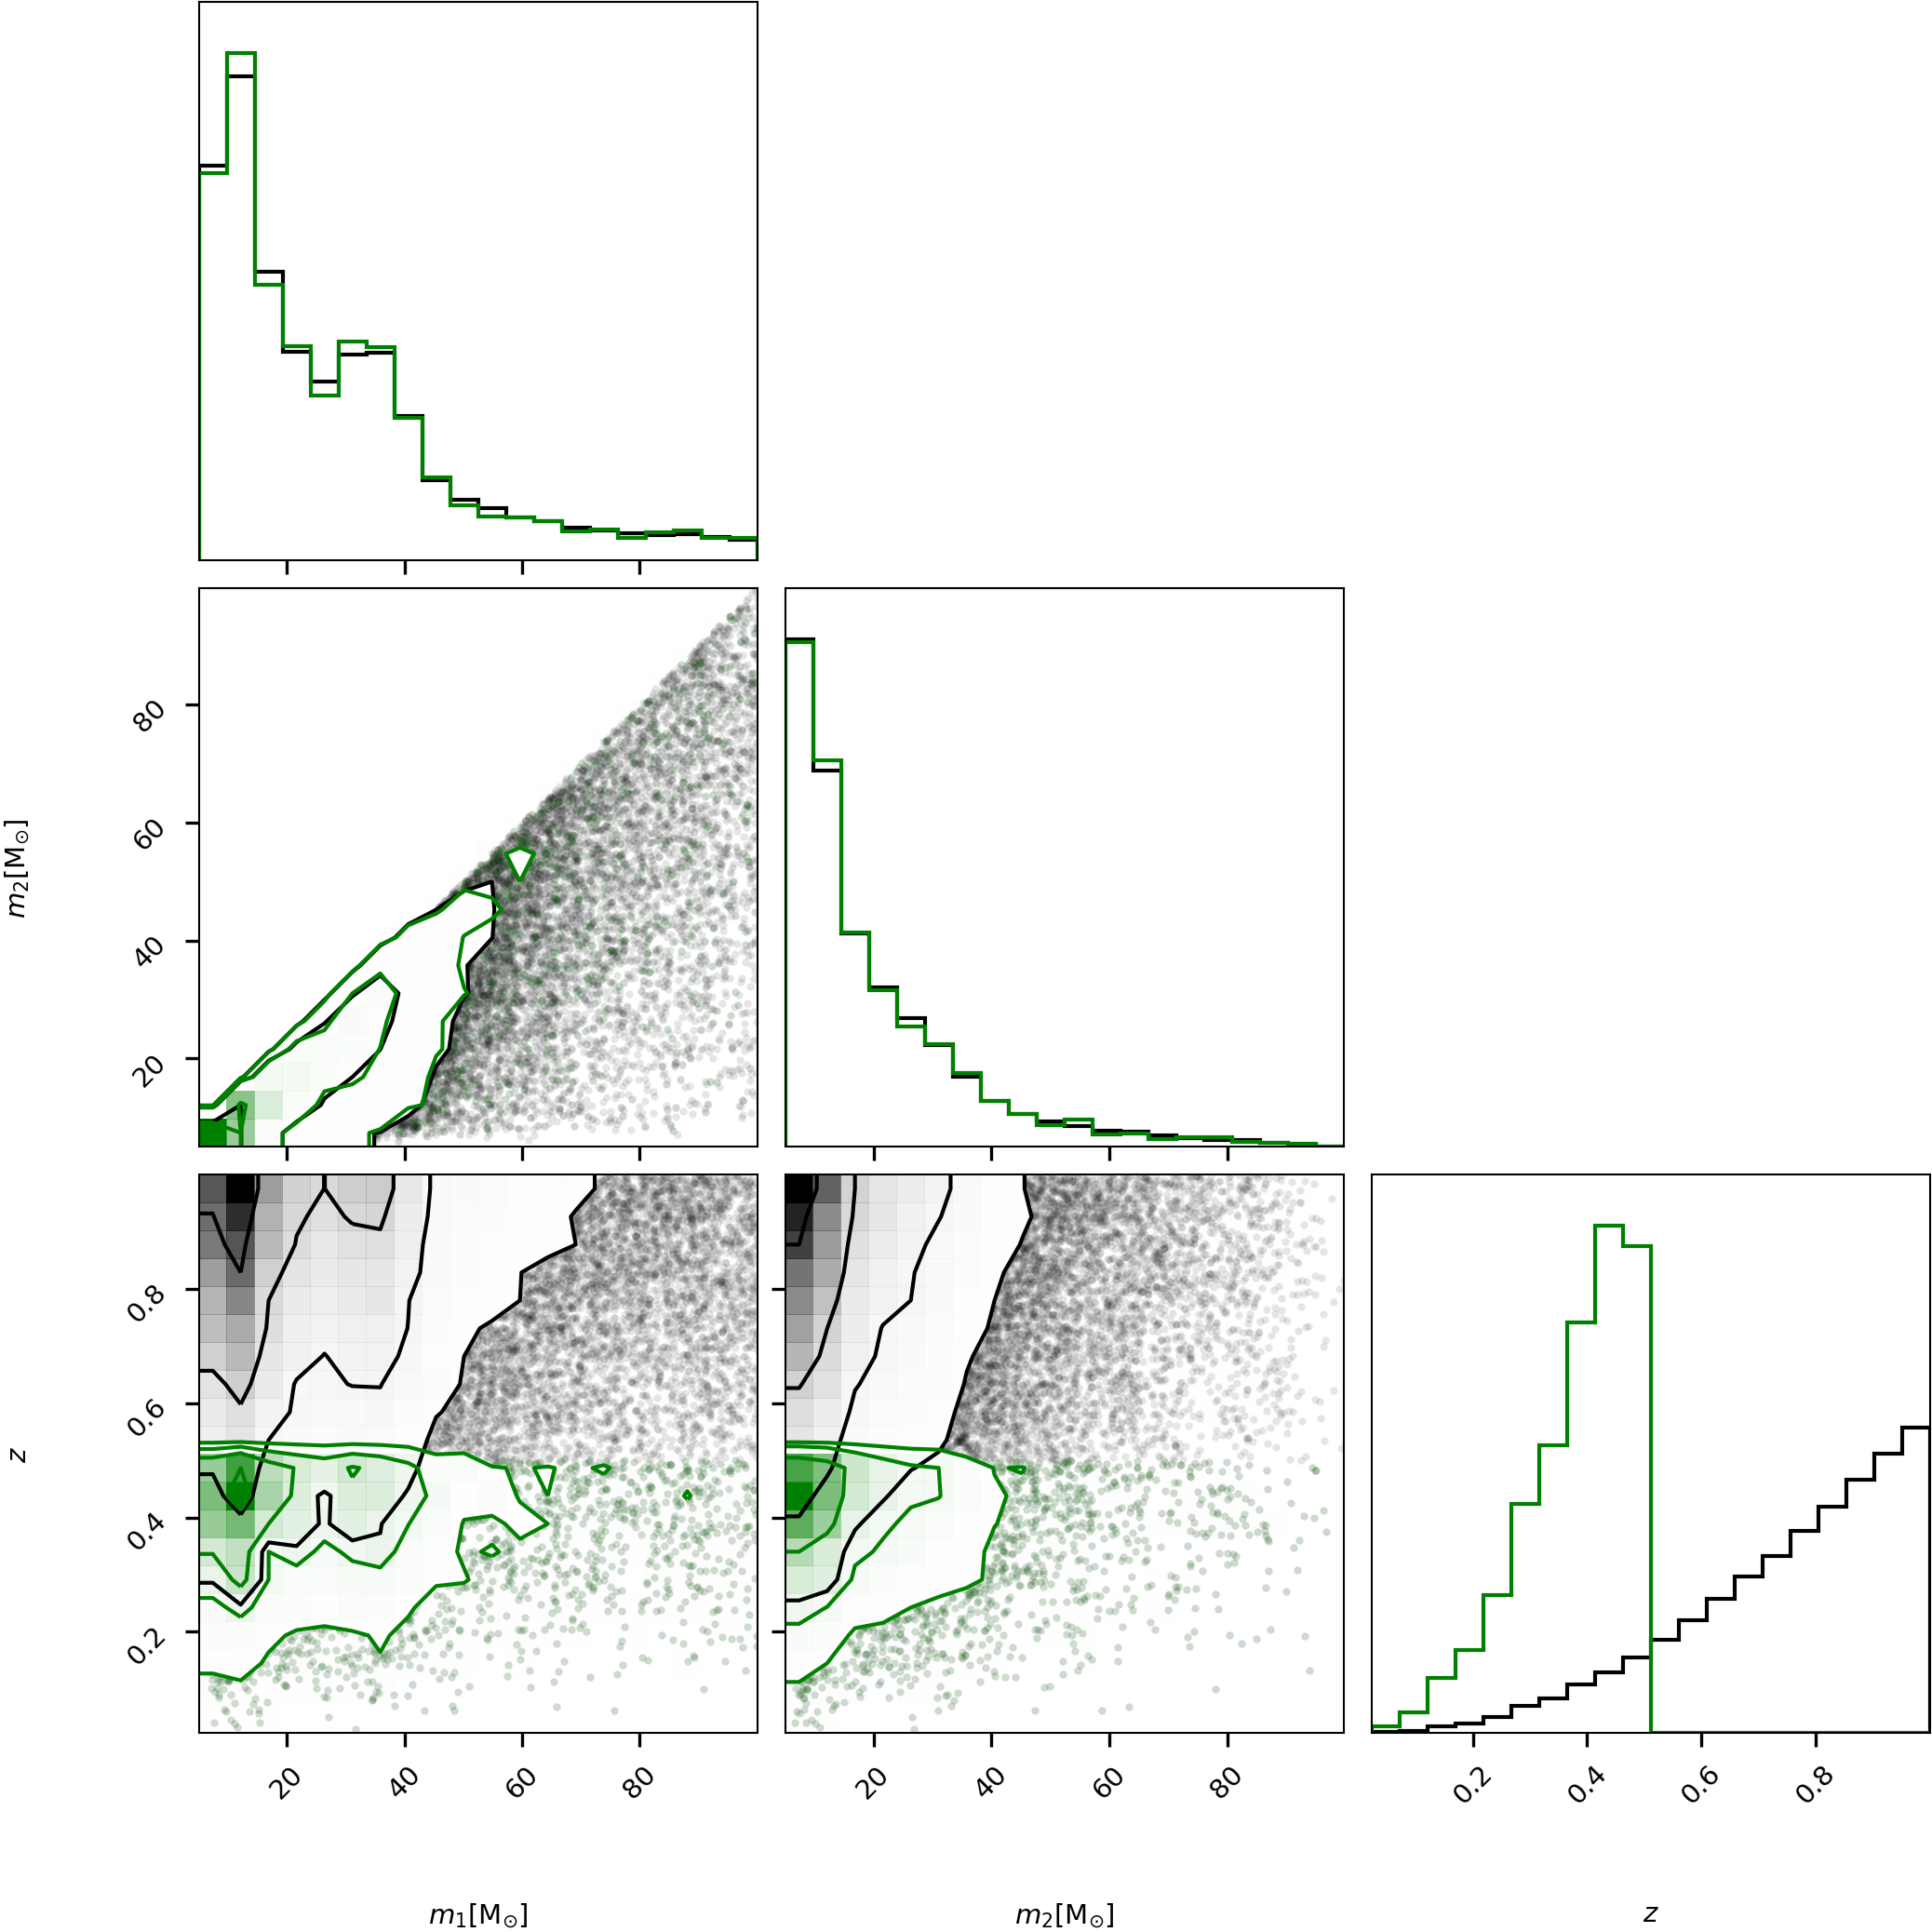

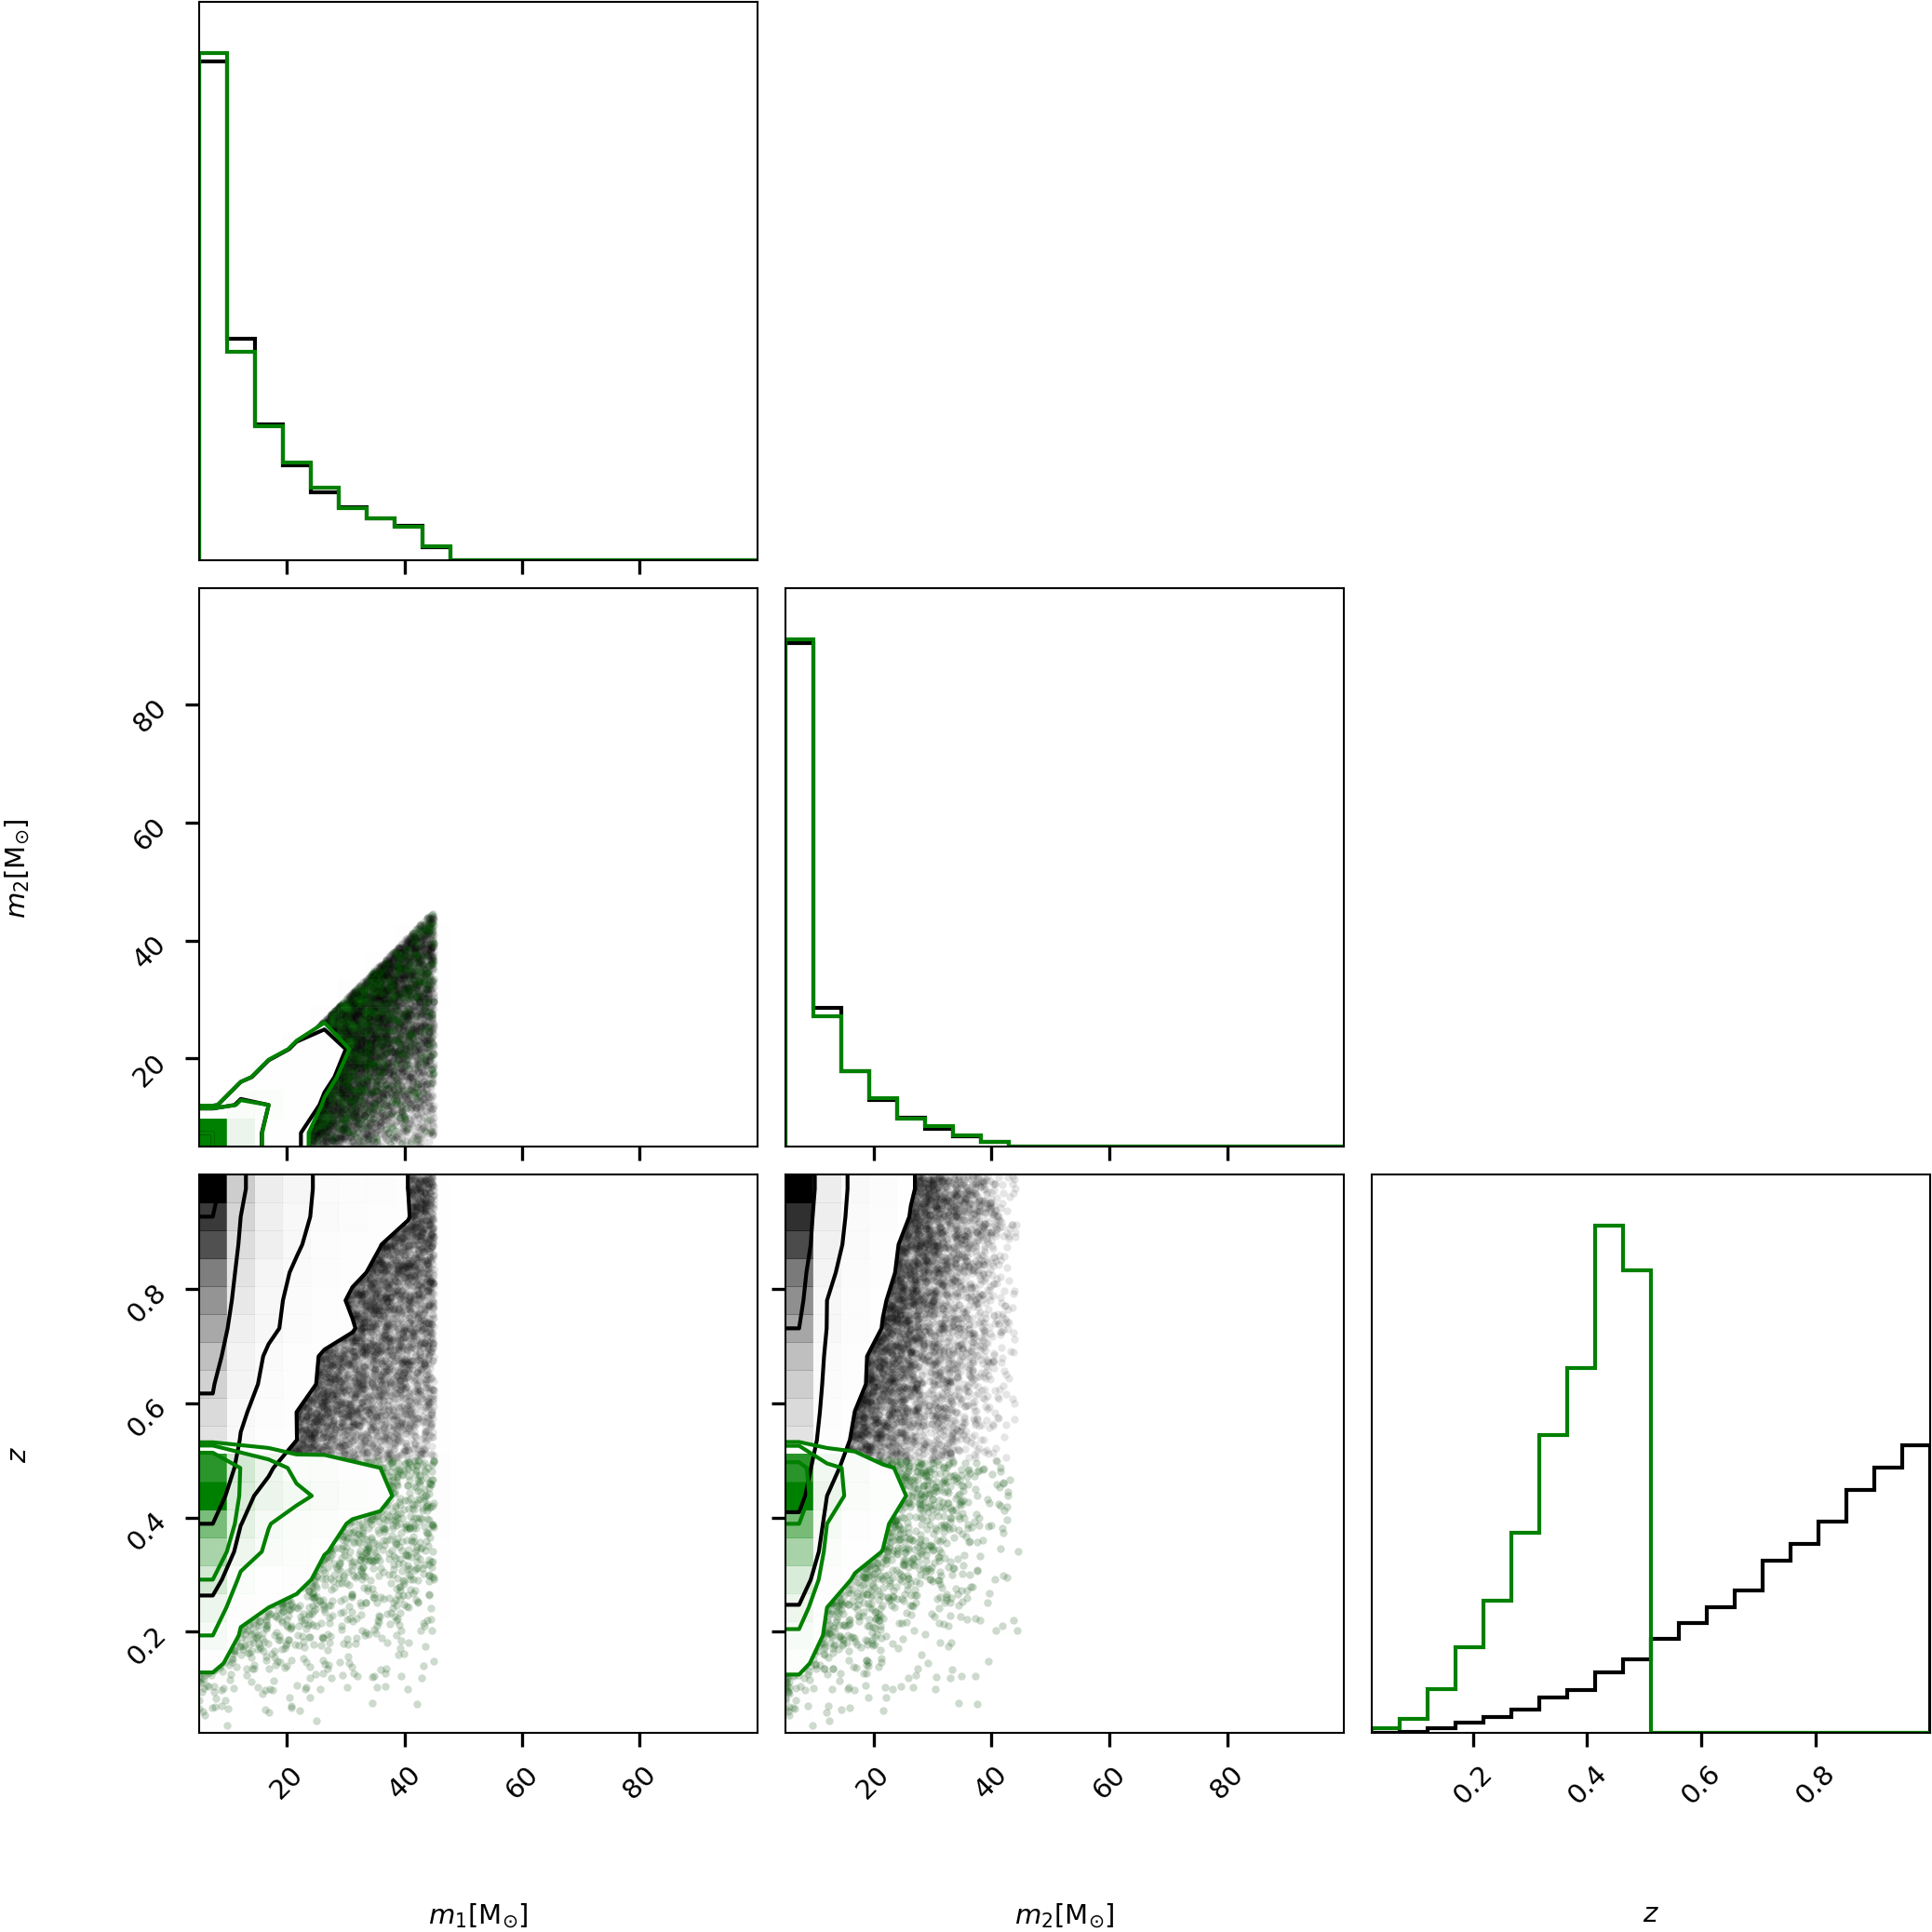

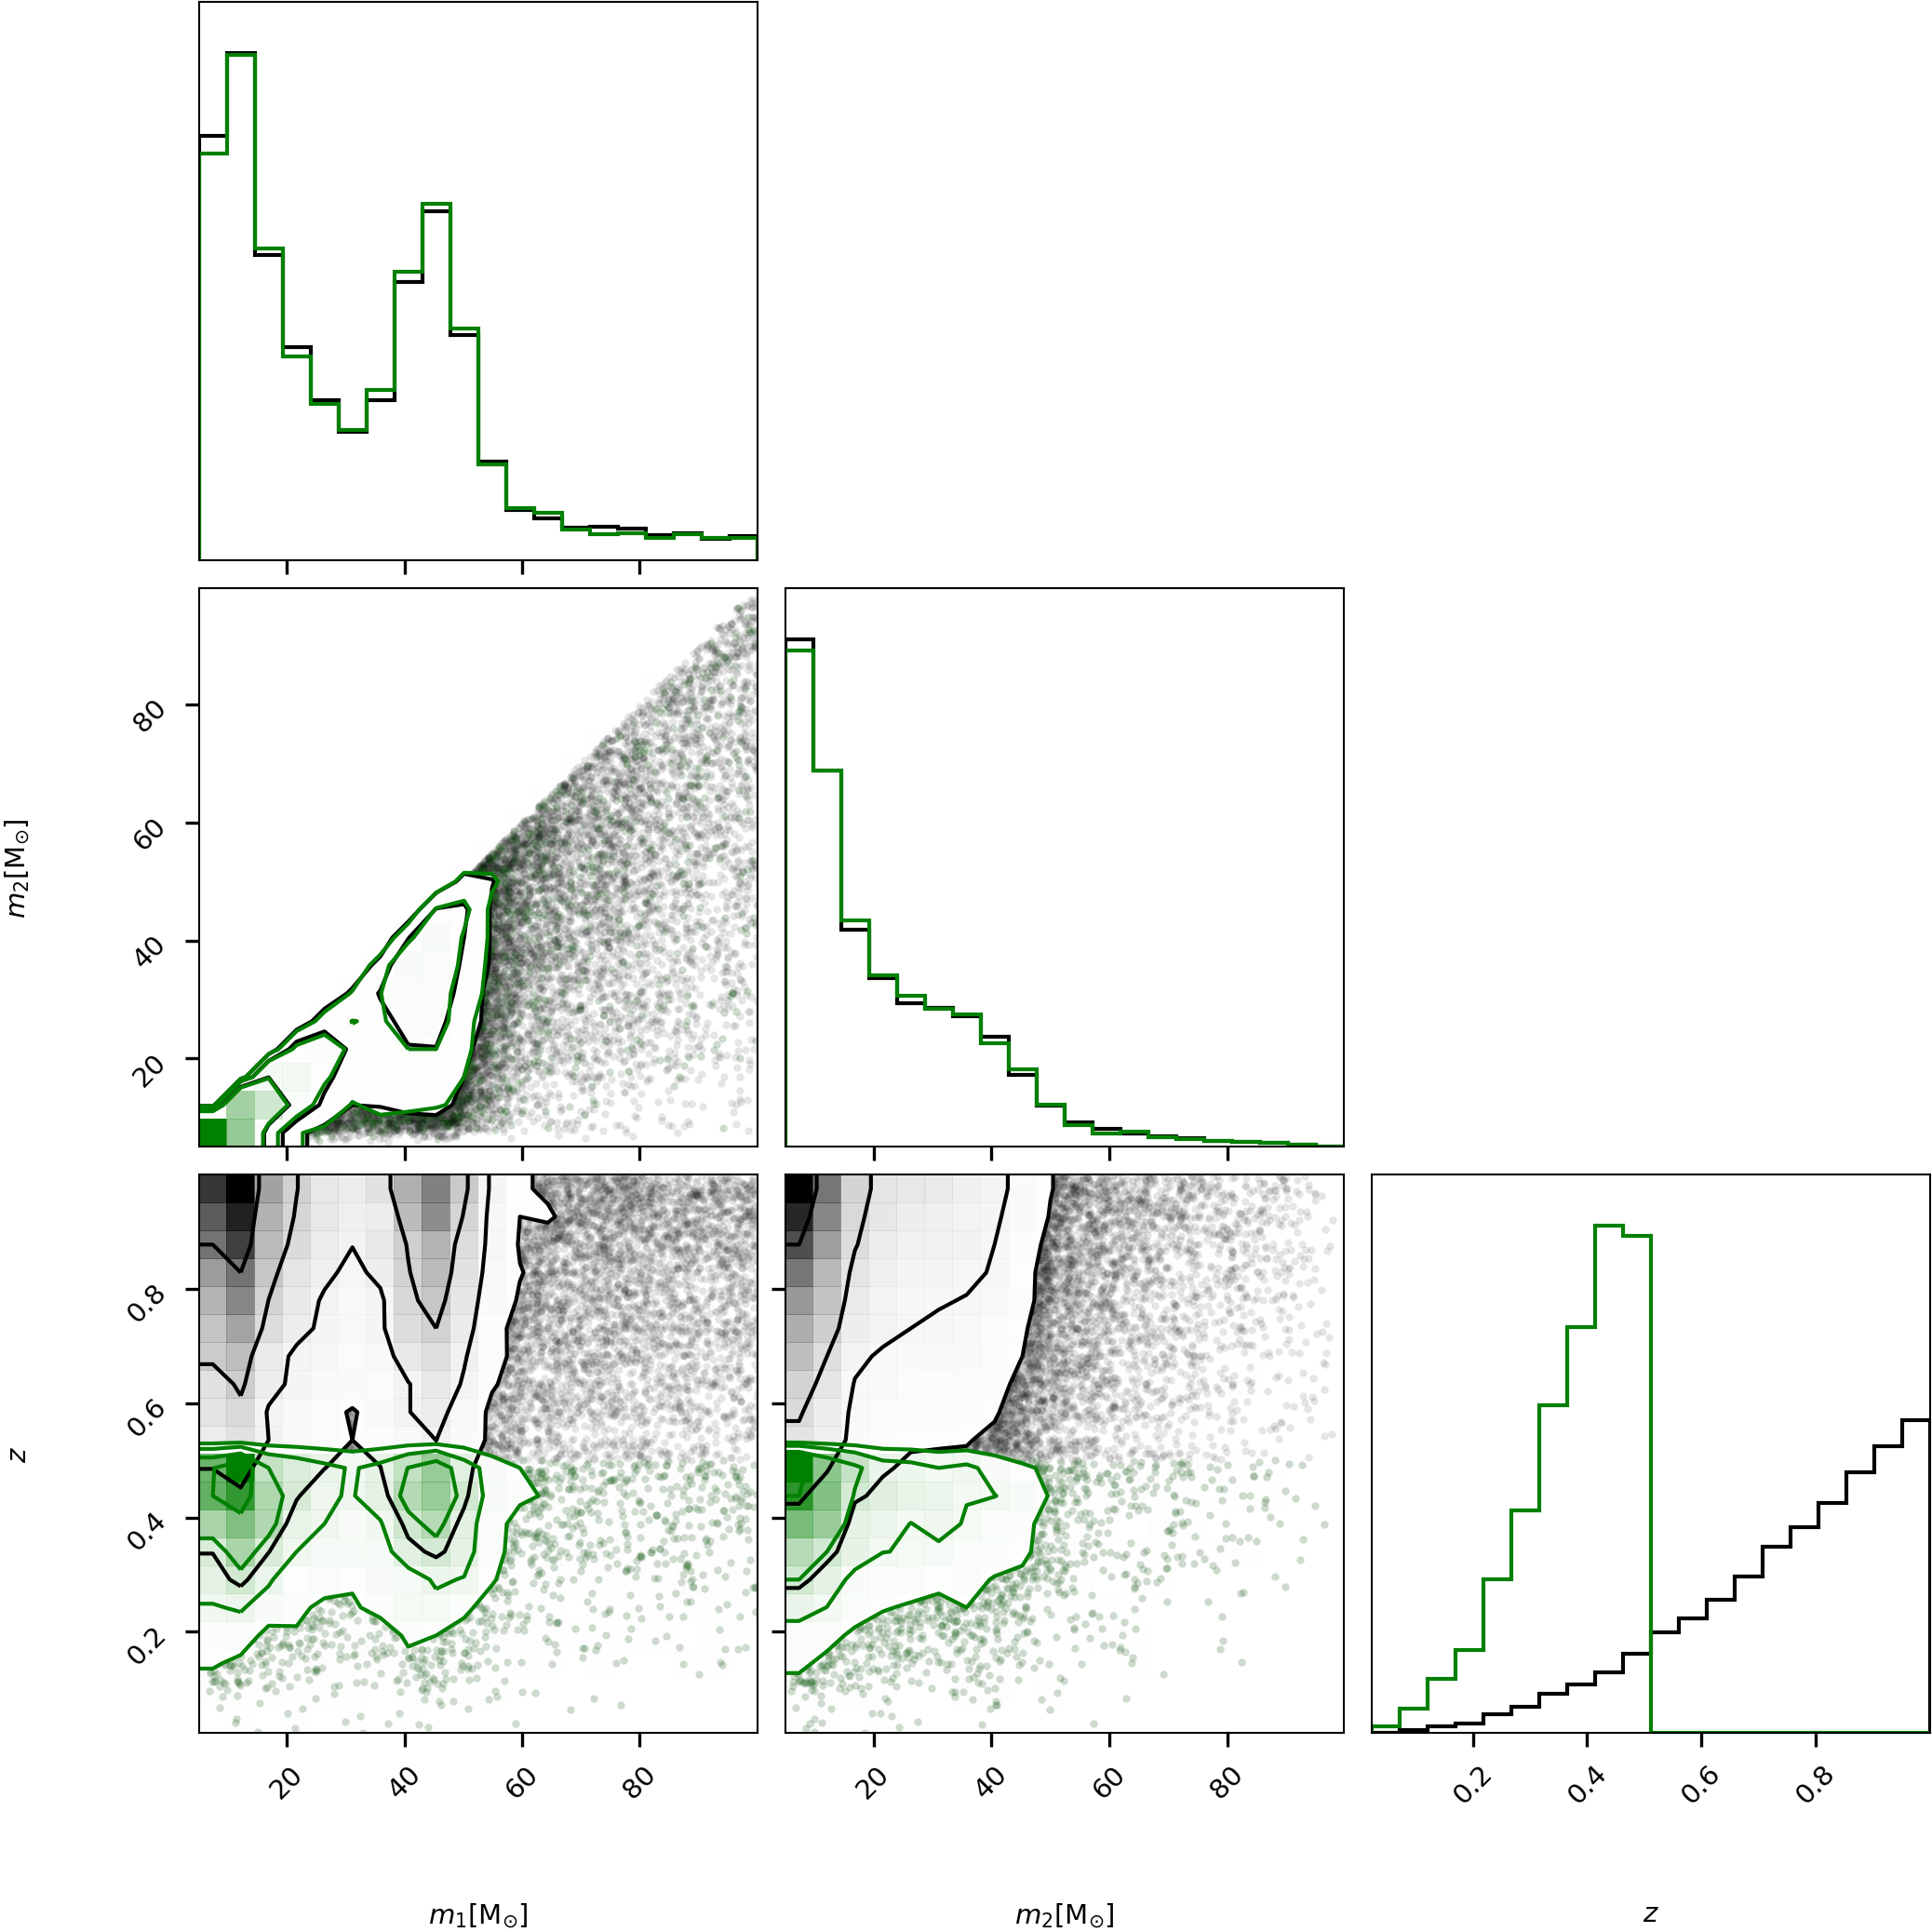

In [47]:
# Defines the list of population and fit the p(phi|variables). 
listofpop=asimovgw.synthetic_population.list_of_populations([pop_0,pop_1,pop_2])
listofpop.calculate_log_pmodel_given_theta(bins)

# histogram the populations
for i in range(len(listofpop.population_list)):
    fig=listofpop.plot_histograms_astrophysical('model_'+str(i),hist_kwargs={'density':True})
    fig=listofpop.plot_histograms_detected('model_'+str(i),hist_kwargs={'density':True},color='green',fig=fig)


/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:84: RuntimeWarning: divide by zero encountered in log
  norm_factor.append(_np.log(self.population_list[key].p_model_given_theta)+_np.log(self.population_list[key].prior_model)+logNpart)
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:86: RuntimeWarning: divide by zero encountered in log
  self.population_list[key].log_p_model_given_theta=_np.log(self.population_list[key].p_model_given_theta)+_np.log(self.population_list[key].prior_model*_np.exp(logNpart))
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:95: RuntimeWarning: invalid value encountered in subtract
  self.population_list[key].log_p_model_given_theta-=log_norm_factor
/home/simone/git_repositories/asimovgw/asimovgw/synthetic_population.py:101: RuntimeWarning: divide by zero encountered in log
  self.log_p_null_model_given_theta=_np.log(self.p_null_model_given_theta)
/home/simone/git_repositories/asimovgw/asi

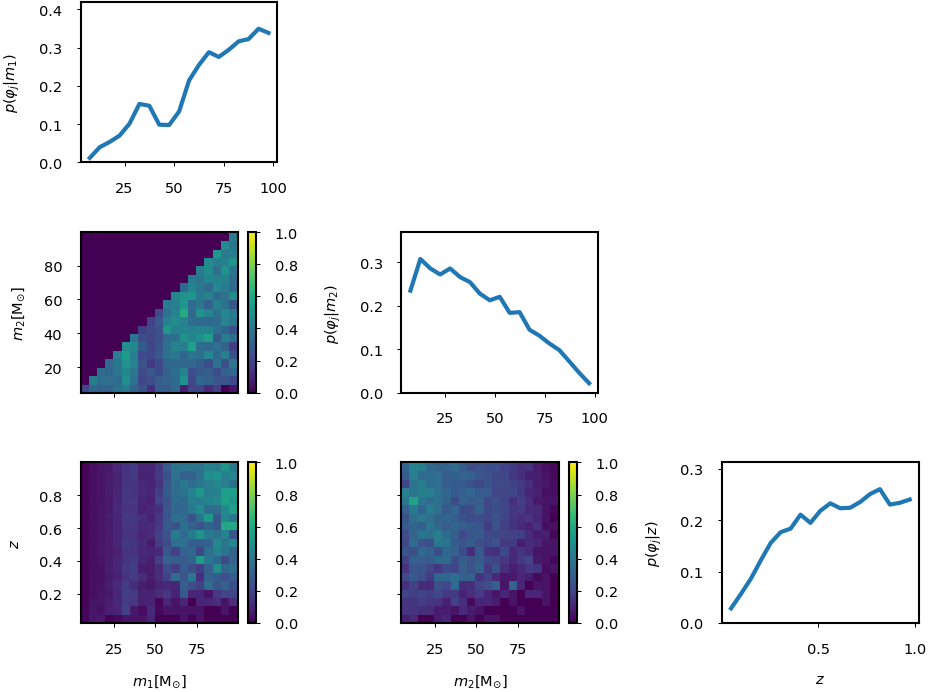

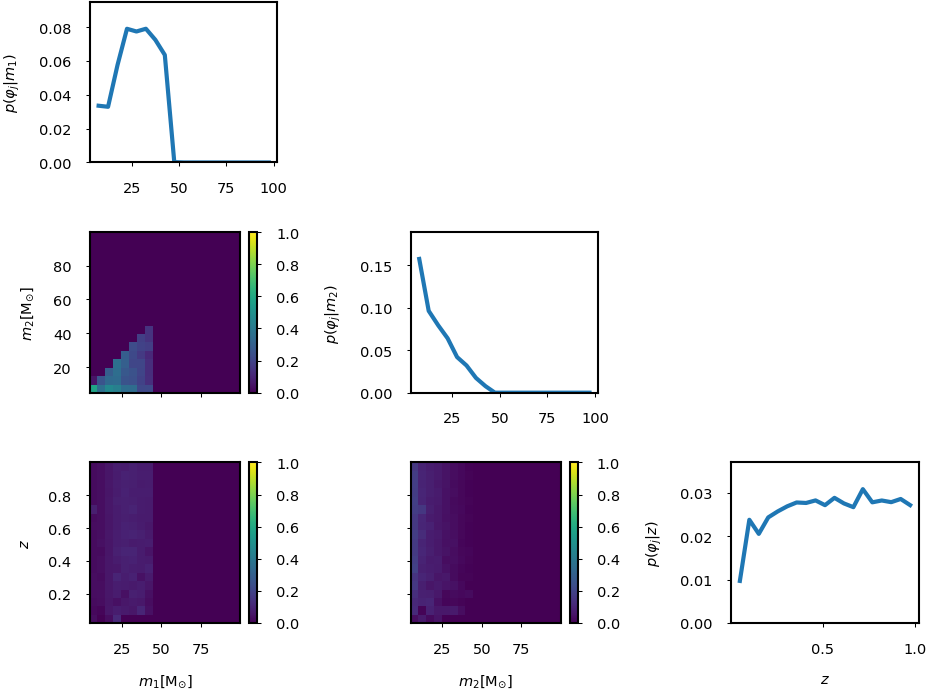

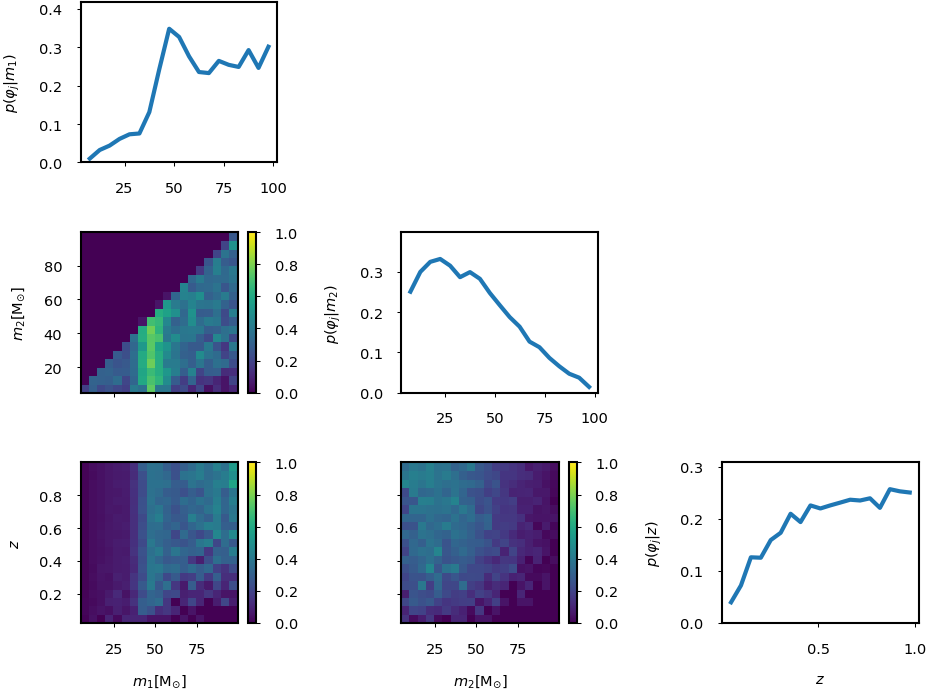

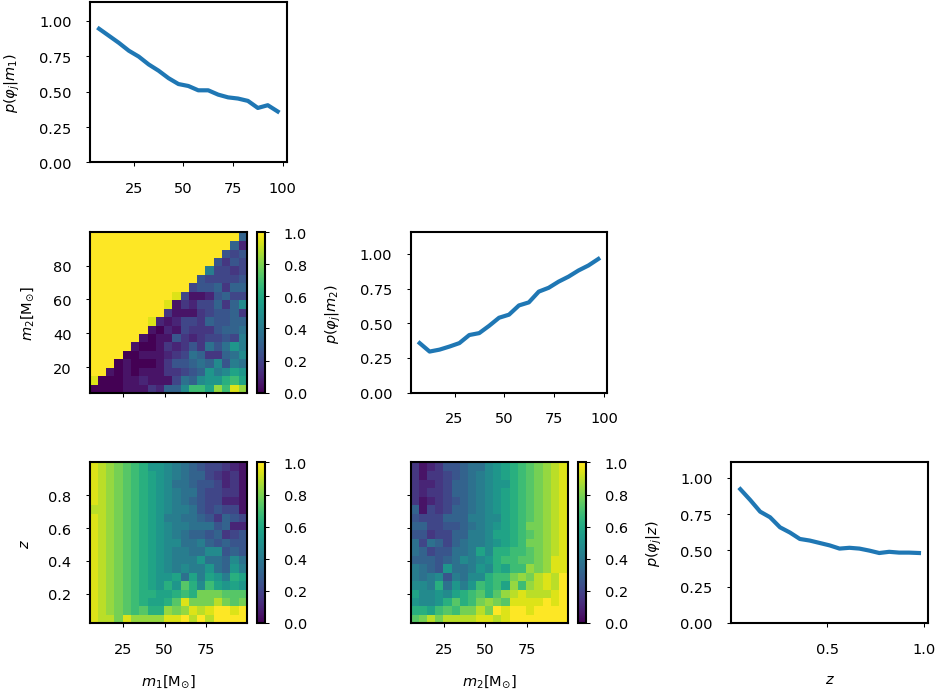

In [48]:
# Plots the p(phi|m)
for i in range(len(listofpop.population_list)):
    listofpop.plot_pmodel_given_theta('model_'+str(i),bins)
listofpop.plot_pmodel_given_theta('null',bins)

In [49]:
## Here we imagine that we have determined the true population with an uncertainty on its 
# parameters of 10%. We generate 100 phenomenological populations from these uncertainties and calculate
# the overlap

pop_reco_list=[]
Nexp_list=[]
Nunc=100
hp_mp_true={'mmin':5, 'mmax':100,'alpha':1.5,'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,'lambda_peak':0.1}
hp_zp_true={'gamma':3.,'zp':2,'kappa':6}

for i in range(Nunc):
    hp_mp_test={var:hp_mp_true[var]*(1+np.random.randn()*0.10) for var in hp_mp_true.keys()}
    hp_zp_test={var:hp_zp_true[var]*(1+np.random.randn()*0.10) for var in hp_zp_true.keys()}

    true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict=hp_mp_test)
    true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                                ,'madau',hp_zp_test)
    Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0*(1+np.random.randn()*0.10)
    m1s,m2s=true_mass_distro.sample(10000)
    zs=true_redshift_distro.sample(10000)
    Nexp_list.append(len(np.where(zs<=zcut)[0])*Ntotal/10000)

    pop_reco_list.append({'mass_1_source':m1s,
               'mass_2_source':m2s,
                'redshift':zs})

outer=listofpop.calculate_phehom_match(pop_reco_list,bins=bins,list_of_Nexp=Nexp_list)

/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:110: RuntimeWar

In [50]:
# Again we can intepret rations of probabilities to show how much different models overlap
outer

{'model_0': 0.3575917577251747,
 'model_1': 0.29248719865870154,
 'model_2': 0.3400920436161231,
 'null': 0.009829000000000643}

# The posterior object

Now we will see the posterior sample objects. These are objects needed to handle posterior samples on the GW parameter of a GW. We need to posteriors when we want to match our synthetic models to real data by defining some particular analyses (see below)

In [52]:
import h5py 
import asimovgw
import numpy as np

# We readh a posterior sample file
f=h5py.File('GW190916_200658.h5','r')

pos = f['IMRPhenomXPHM/posterior_samples']

# We extract masses and redshift, you can extract whatever you want
popbin={'mass_1_source':{'values':pos['mass_1_source'],'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':pos['mass_2_source'],'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':pos['redshift'],'tex_label':r'$z$','tex_var':r'z'}}



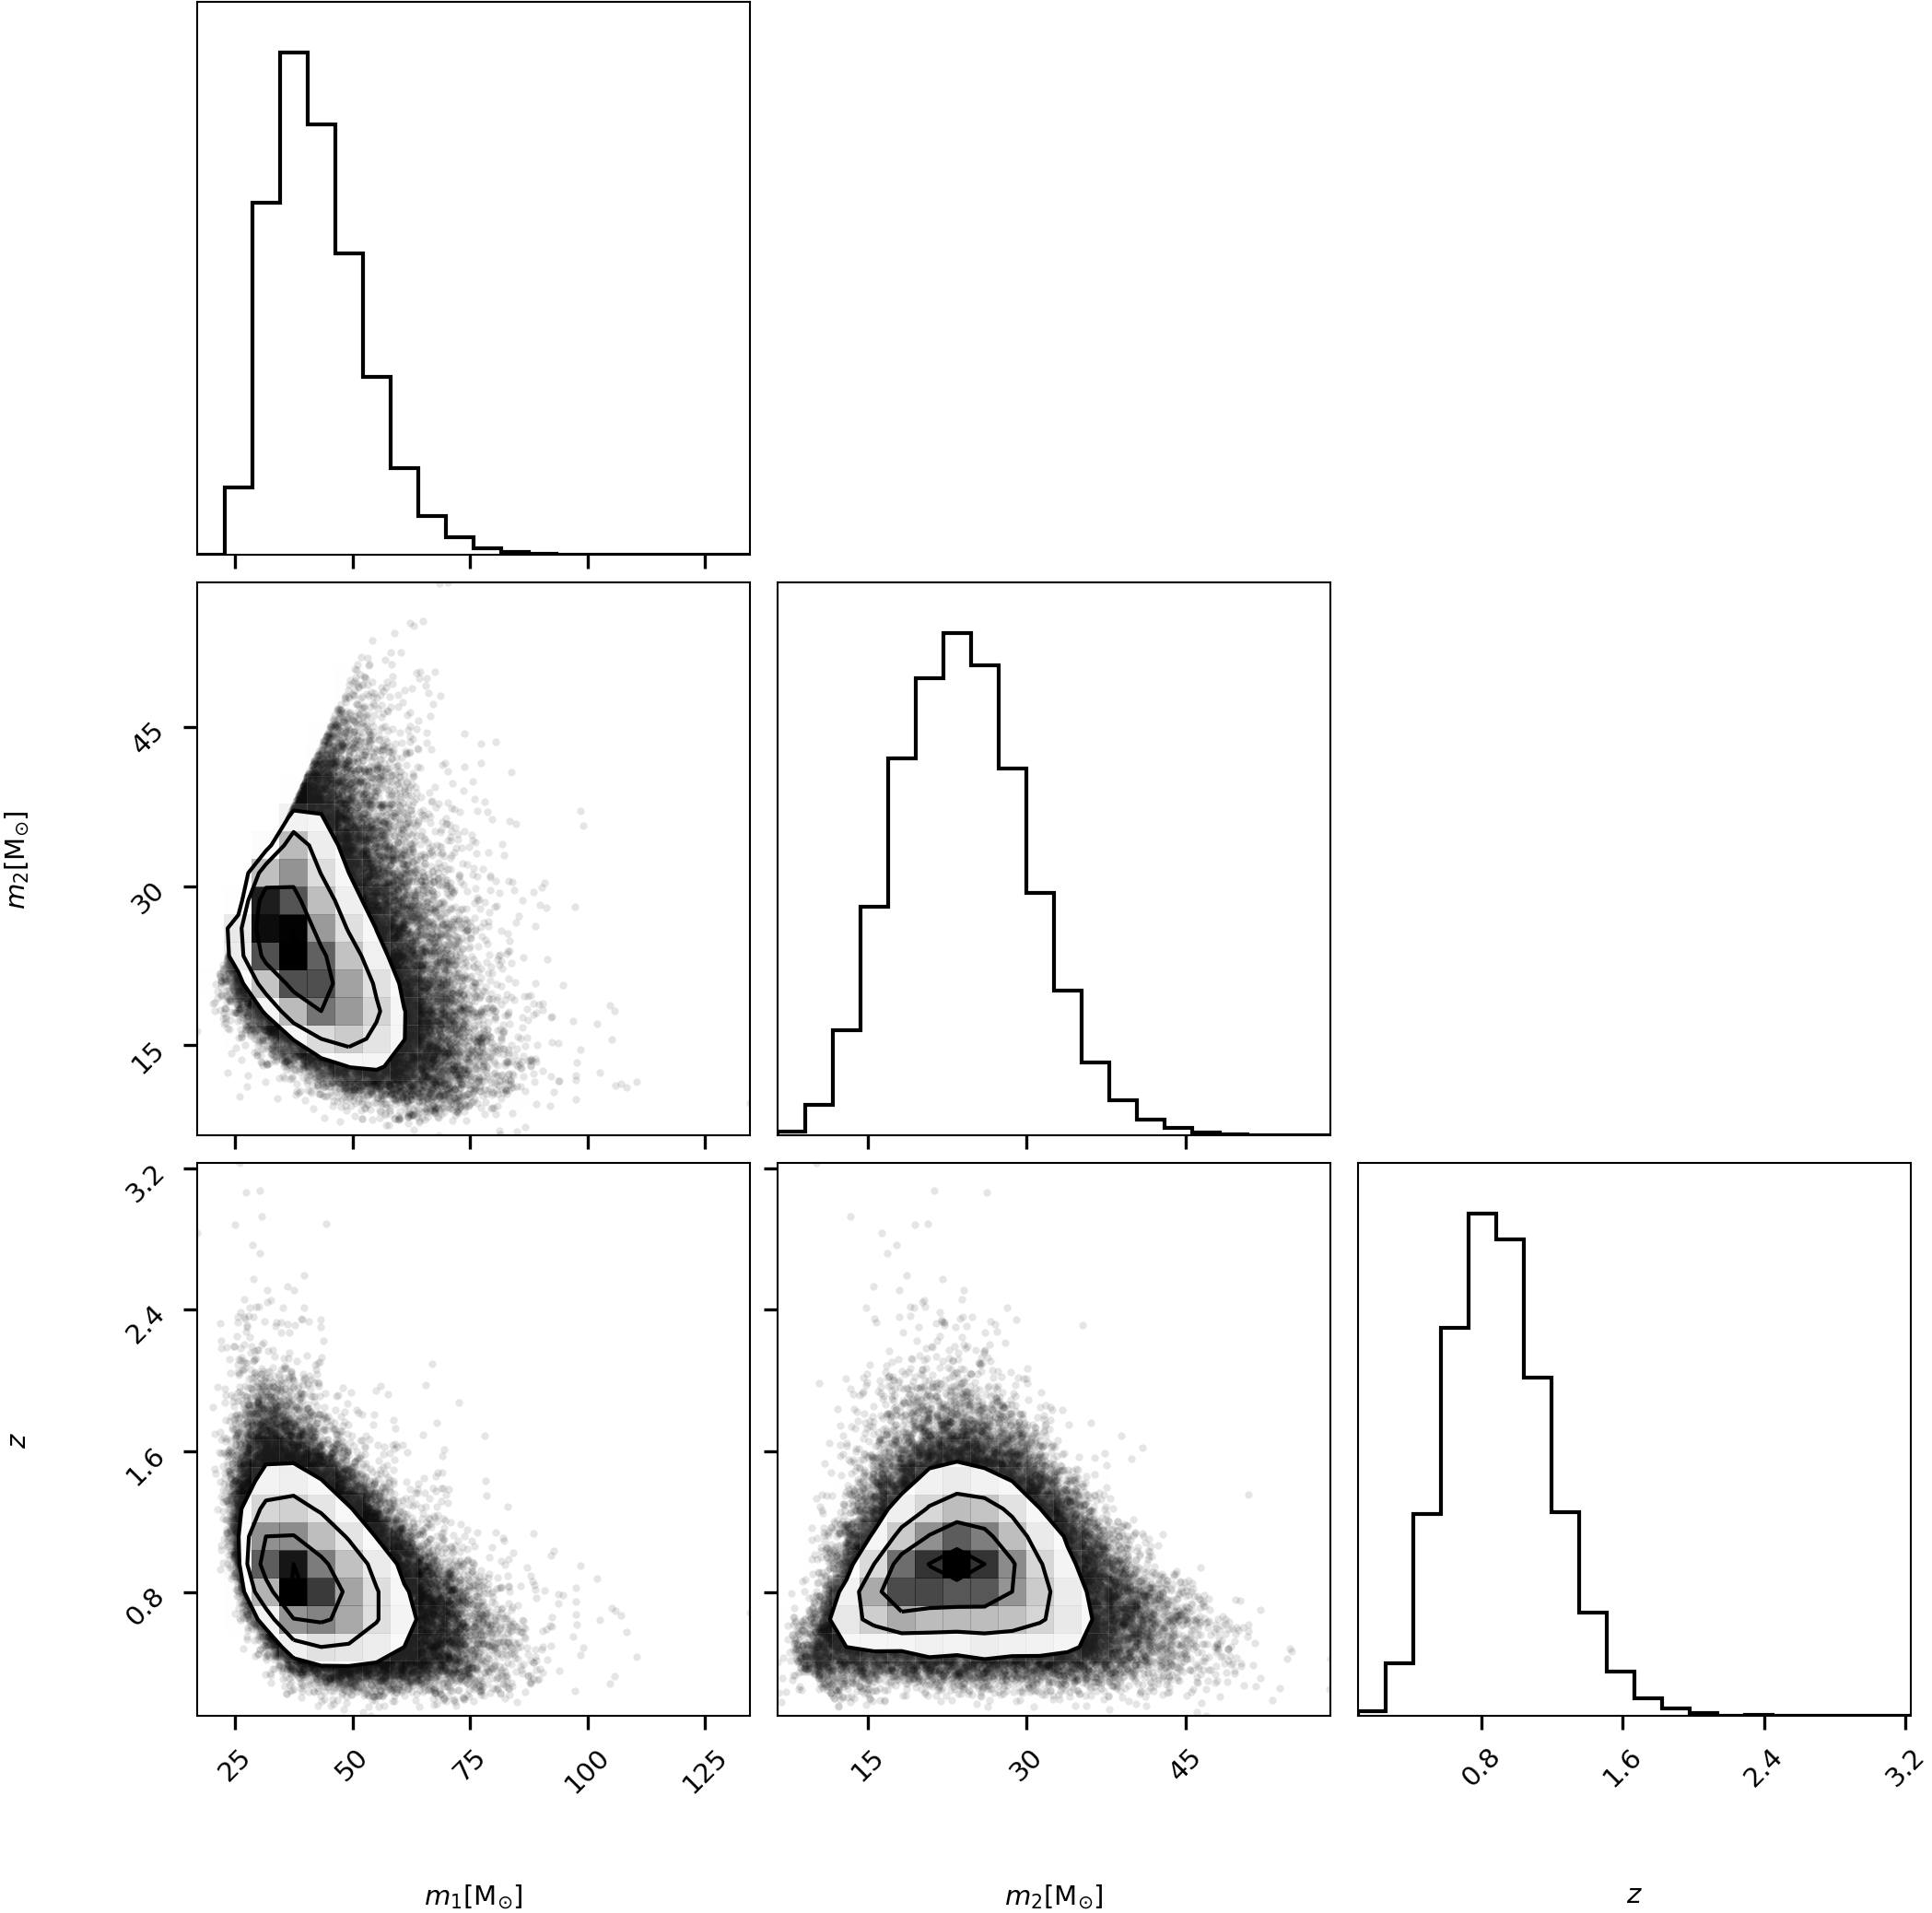

In [54]:
# We initialize the posterior samples and histogram them
GWs=asimovgw.posterior.posterior('GW190916_200658',popbin)
_=GWs.histogram_samples()

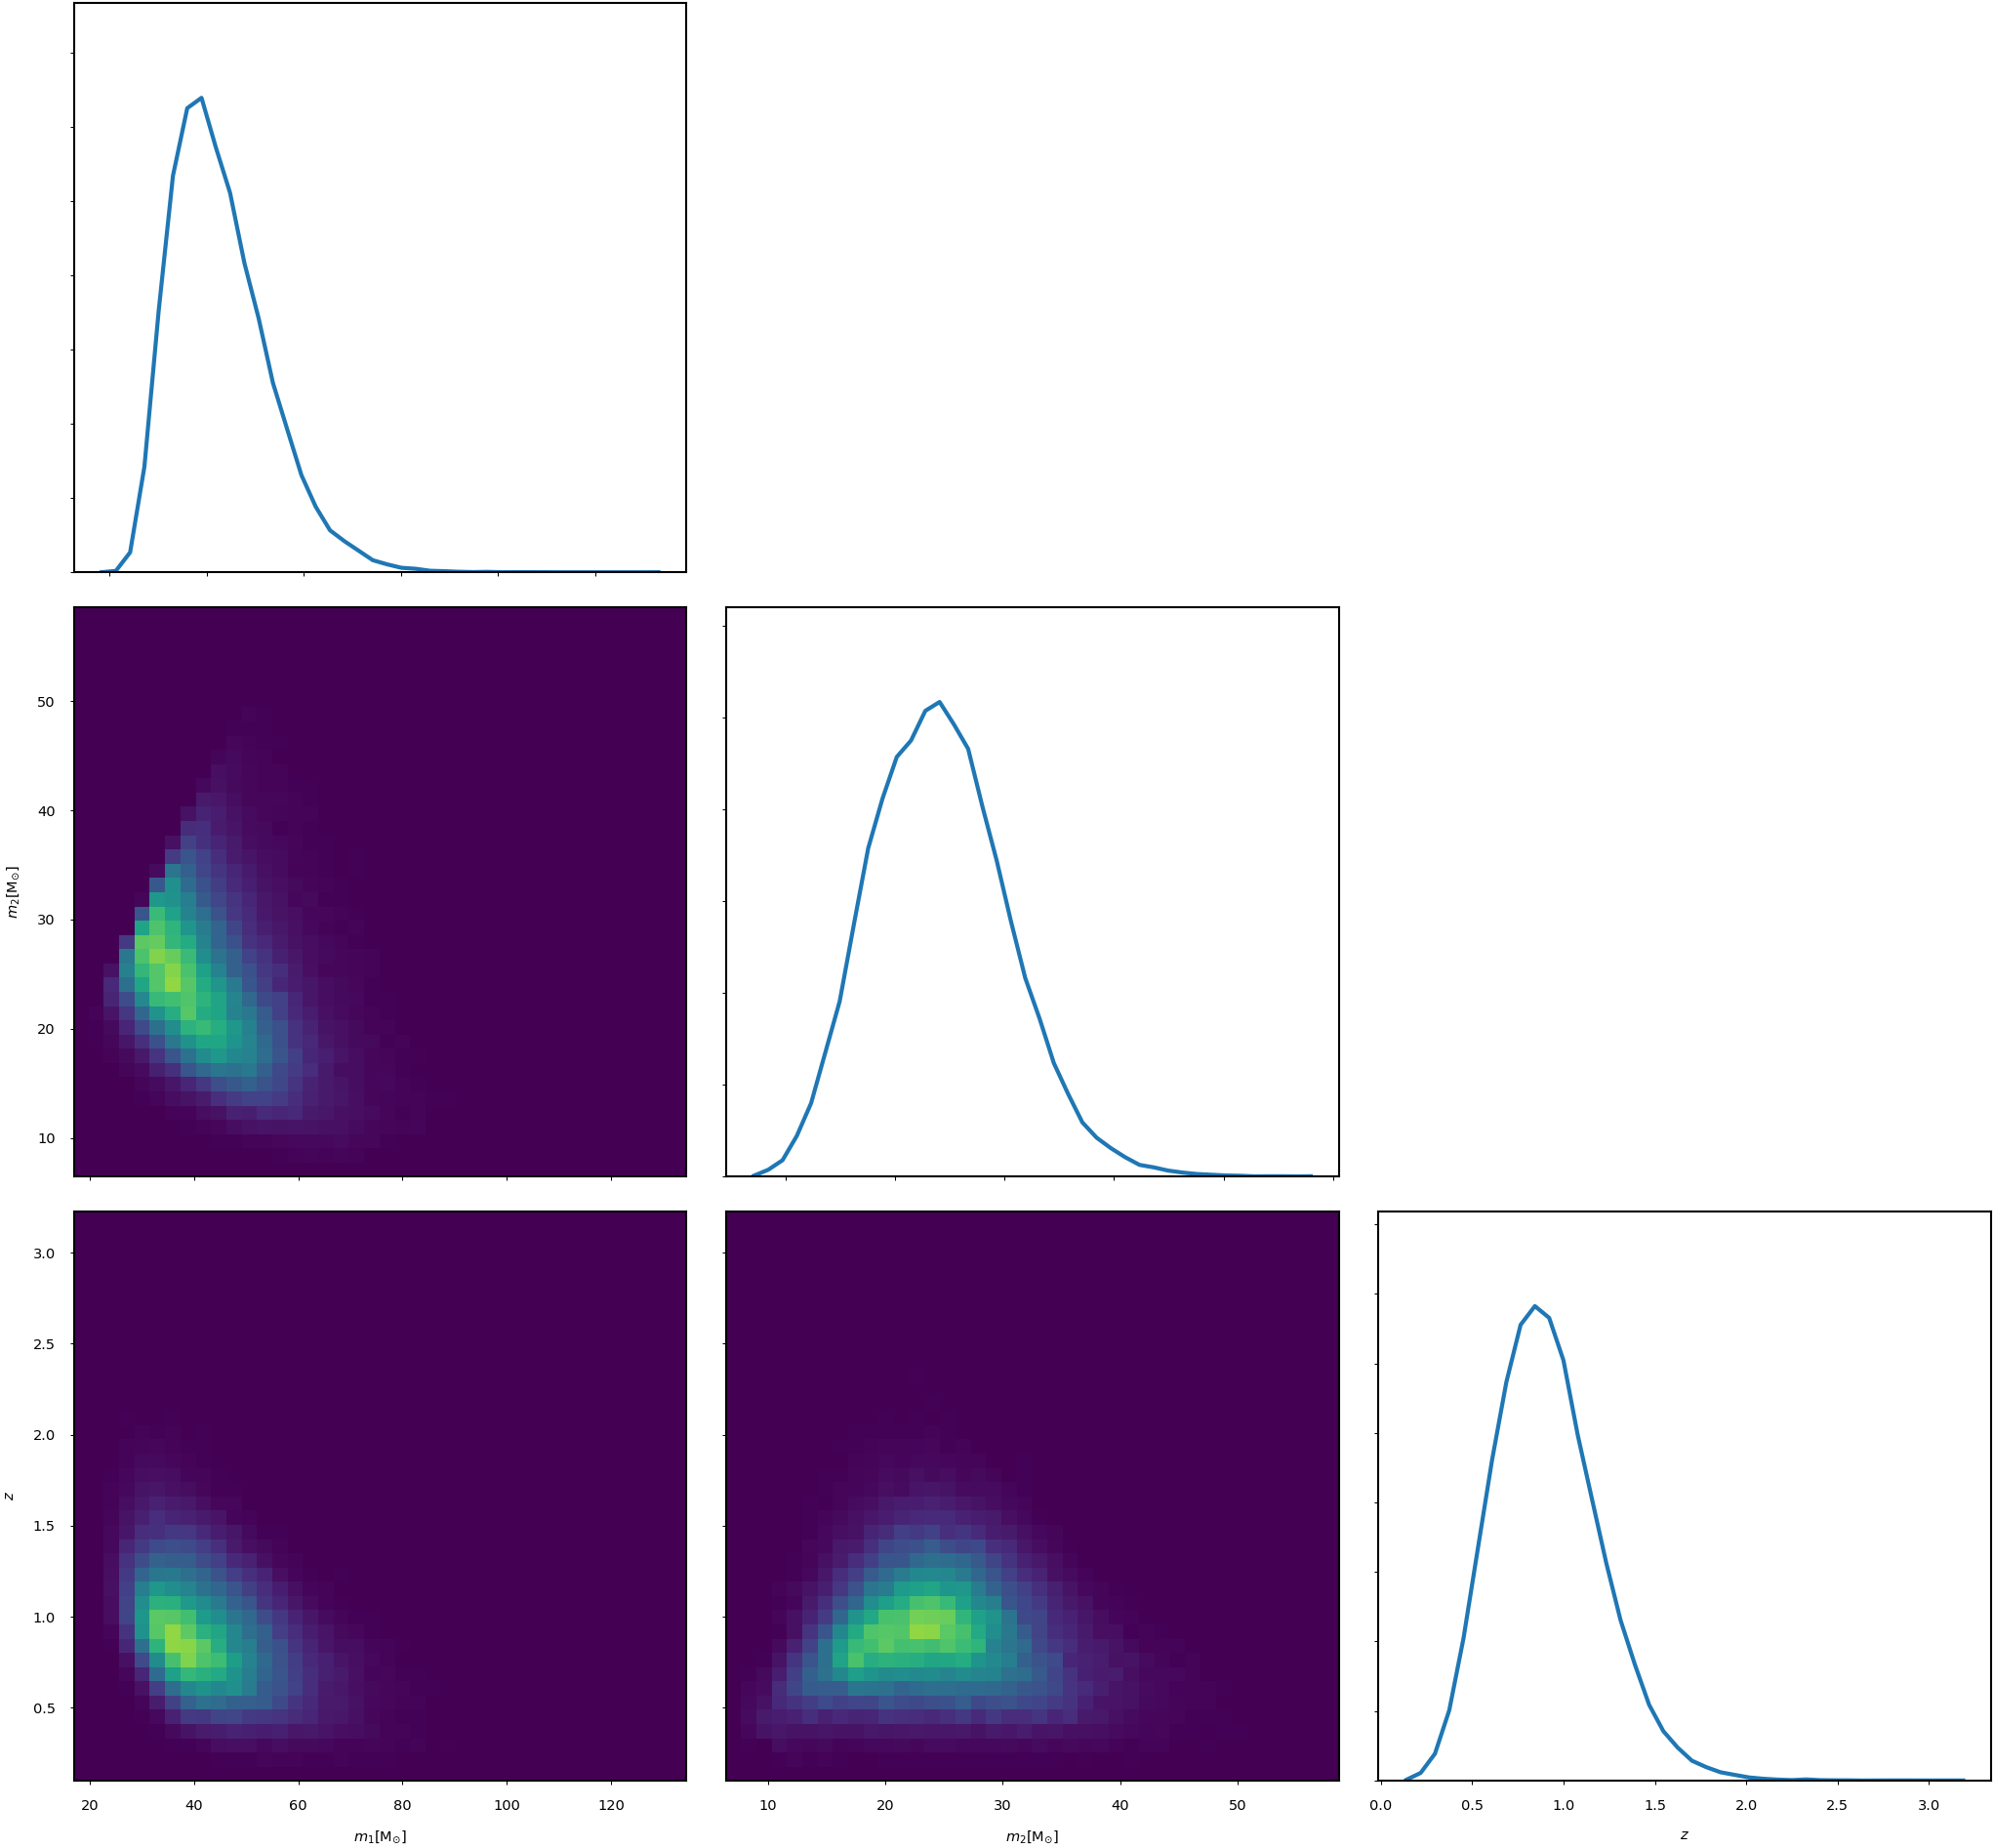

In [56]:
## One of the key component of the analysis is the possibility of fitting the gaussian kernel of the 
# parameters posterior. We have two ways, using a ndhistogram or using a kde fitting.
# KDE fitting: Pro: Very general, no problem of discretization Cons: Usually fails on boundaries and with very strong
# banana shapes
# Histogram fitting: Pro: More robust. Cons: Could suffer discretization (too fine or too corse)

## Here we will use the histogram method with a 40X40X40 bin
GWs.kernelize(kernel_mode='histogram',bins=[40,40,40])
## We histogram the kernel to see possible difficulties in the fit
_=GWs.histogram_kernel()

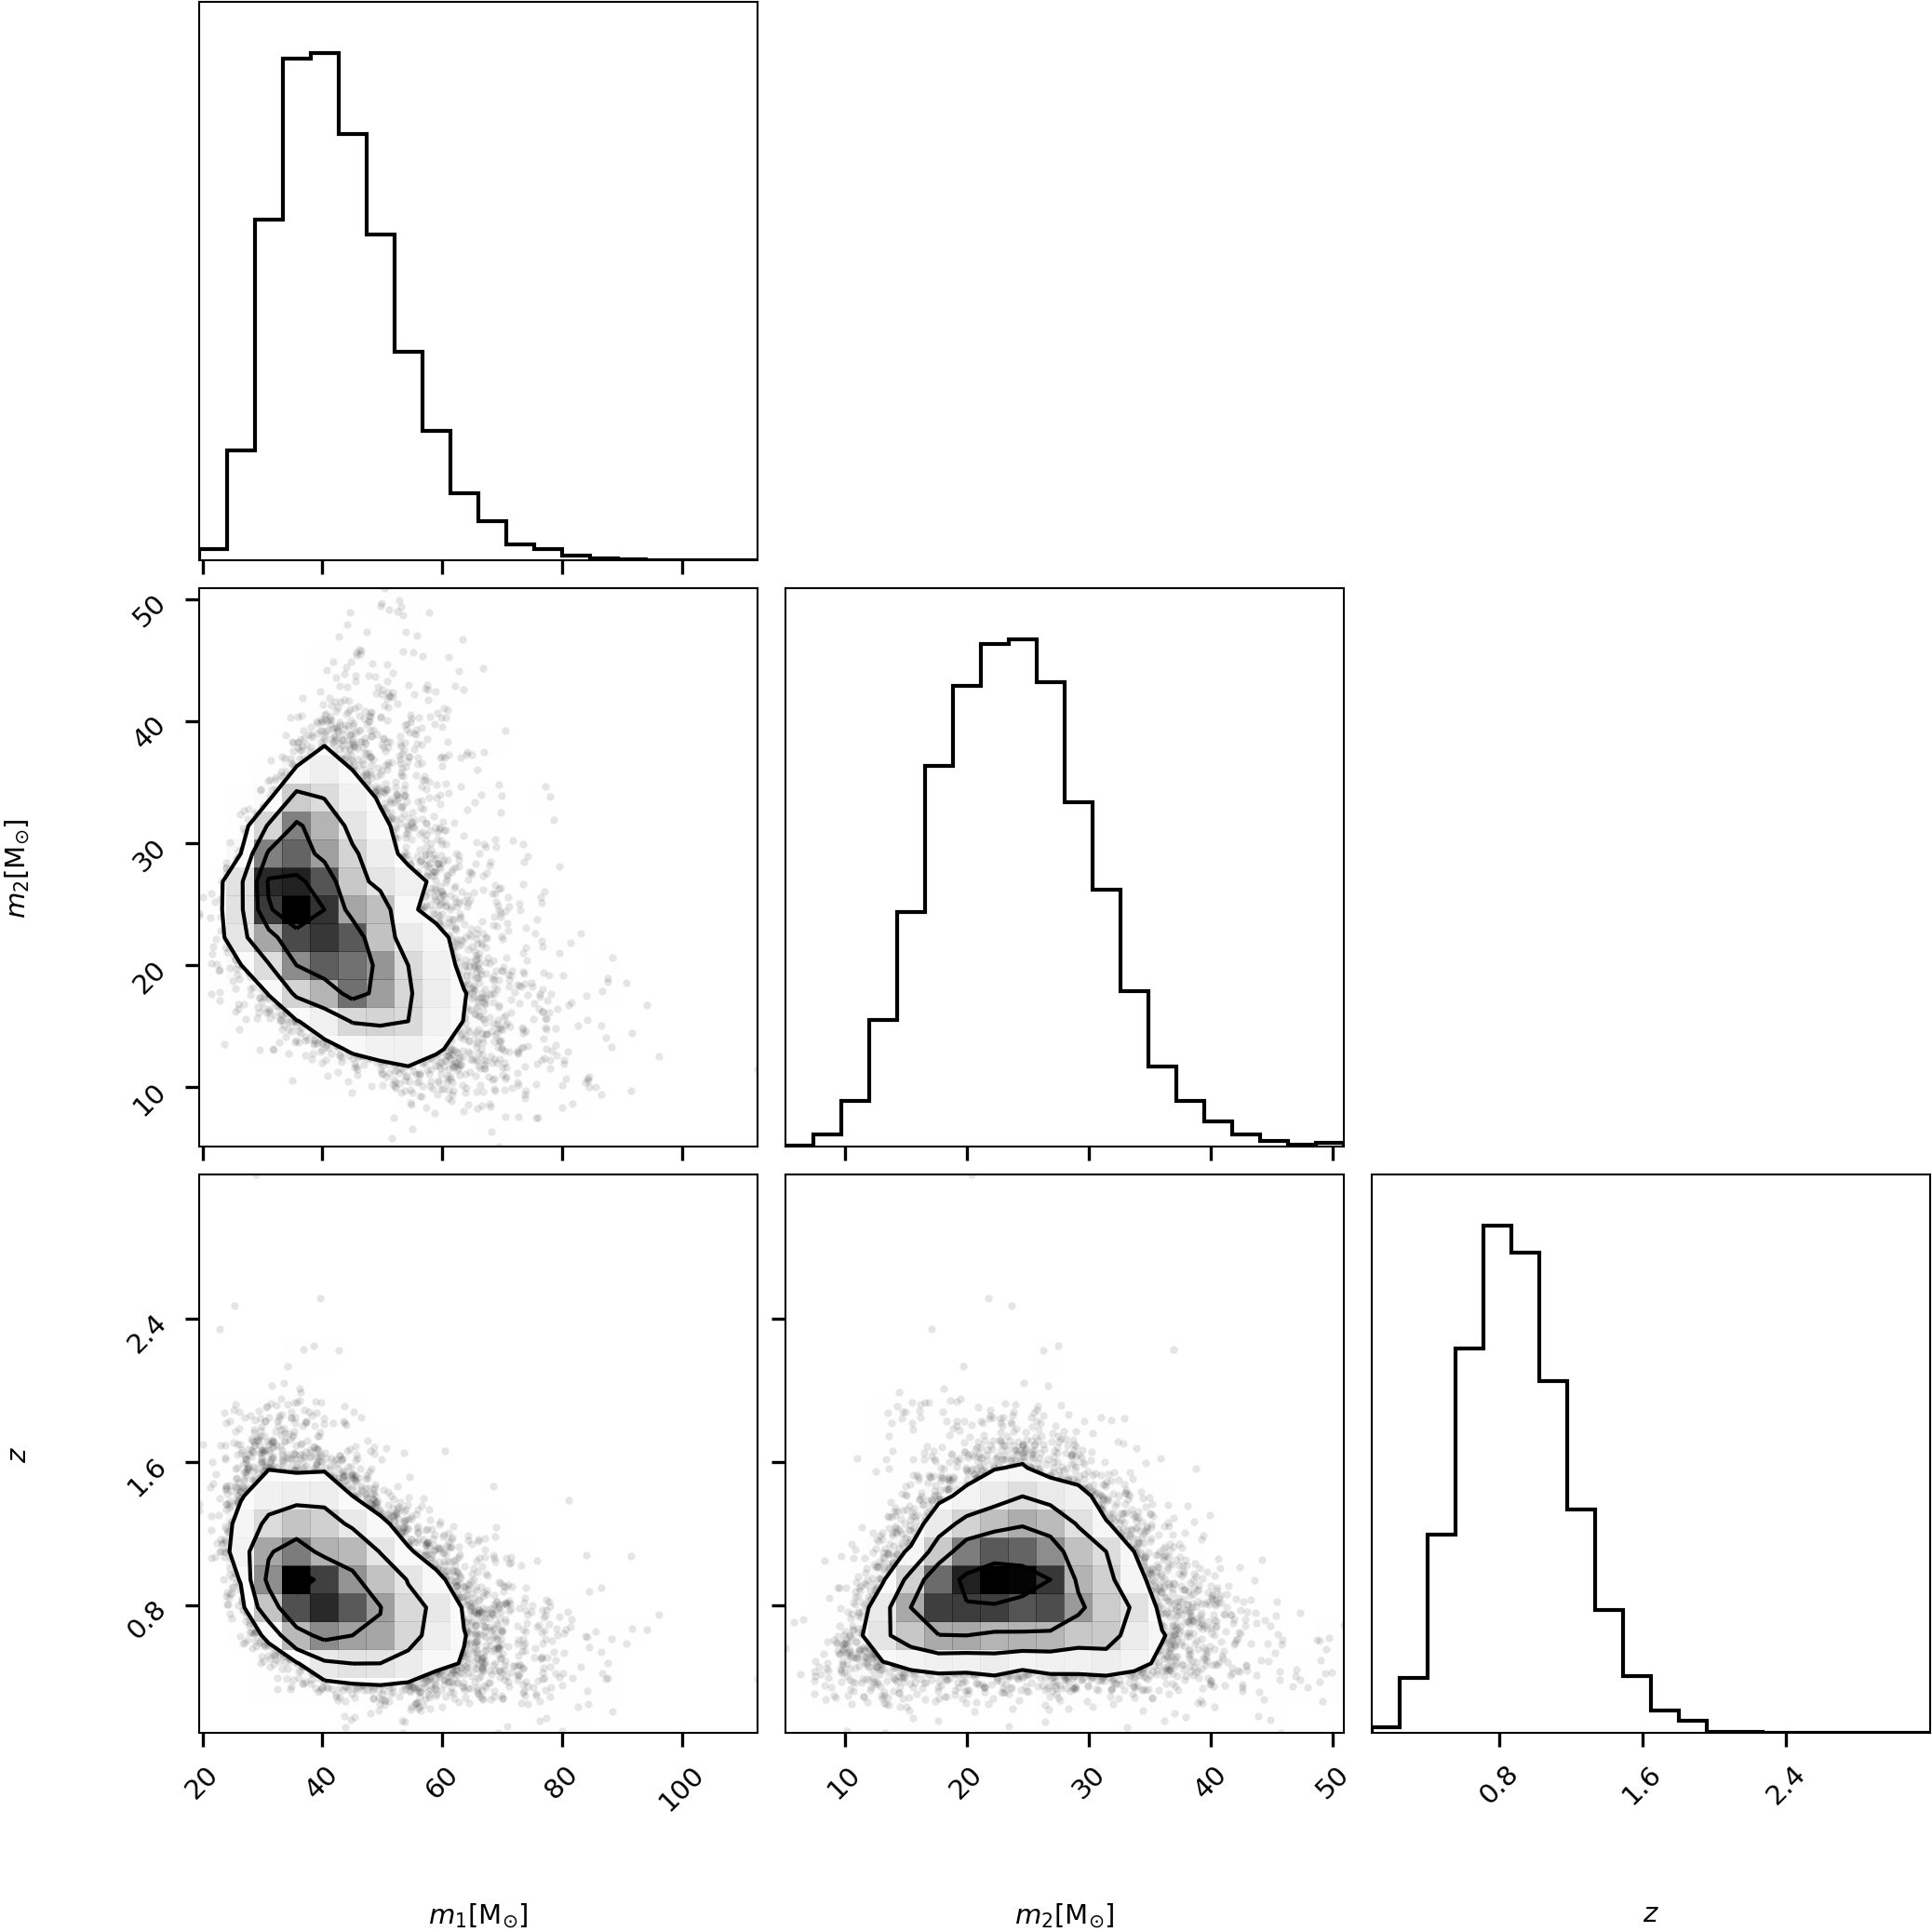

In [57]:
# Same as above but with gaussian kernel fitting
GWs.kernelize(kernel_mode='kde')
_=GWs.histogram_kernel()

In [8]:
import icarogw
import numpy as np
import h5py
import matplotlib.pyplot as plt
import asimovgw
from astropy.cosmology import Planck15
import pickle

R0=0.1
Tobs=.1
zcut=3.0
zlim=np.linspace(0,2.5,10000)
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.5})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(10000)
zs=true_redshift_distro.sample(10000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}


pop_0=asimovgw.synthetic_population.synthetic_population('model_0',Ntotal,popbin,prior_to_rem=np.ones(10000),prior_model=1.,Tobs=Tobs)


In [9]:
pop_0.generate_delta_like_injections('./',int(pop_0.expected_detections),sigma={'mass_1_source':0.05,
                                                                               'mass_2_source':0.05,
                                                                               'redshift':0.05})

In [10]:
pos_dict={}
for i in range(int(pop_0.expected_detections)):
    data=pickle.load(open('injection_{:d}.p'.format(i),'rb'))
    GWs=asimovgw.posterior.posterior('GW_'+str(i),data)
    pos_dict['GW_'+str(i)]=GWs

In [11]:
pop_0.expected_detections

37.79051265600768

In [12]:
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.5})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(100000)
zs=true_redshift_distro.sample(100000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_0=asimovgw.synthetic_population.synthetic_population('PL',Ntotal,popbin,prior_to_rem=np.ones(100000),prior_model=1.,Tobs=Tobs)


true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':1.0})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(100000)
zs=true_redshift_distro.sample(100000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_1=asimovgw.synthetic_population.synthetic_population('G',Ntotal,popbin,prior_to_rem=np.ones(100000),prior_model=1.,Tobs=Tobs)


listofpop=asimovgw.synthetic_population.list_of_populations([pop_0,pop_1])

In [13]:
mixt=asimovgw.analyses.mixture_analyis(pos_dict,listofpop)

In [14]:
mixt.calculate_loglij_logsj_logexp_arrays(kernel_mode='kde',bw_method=0.01)

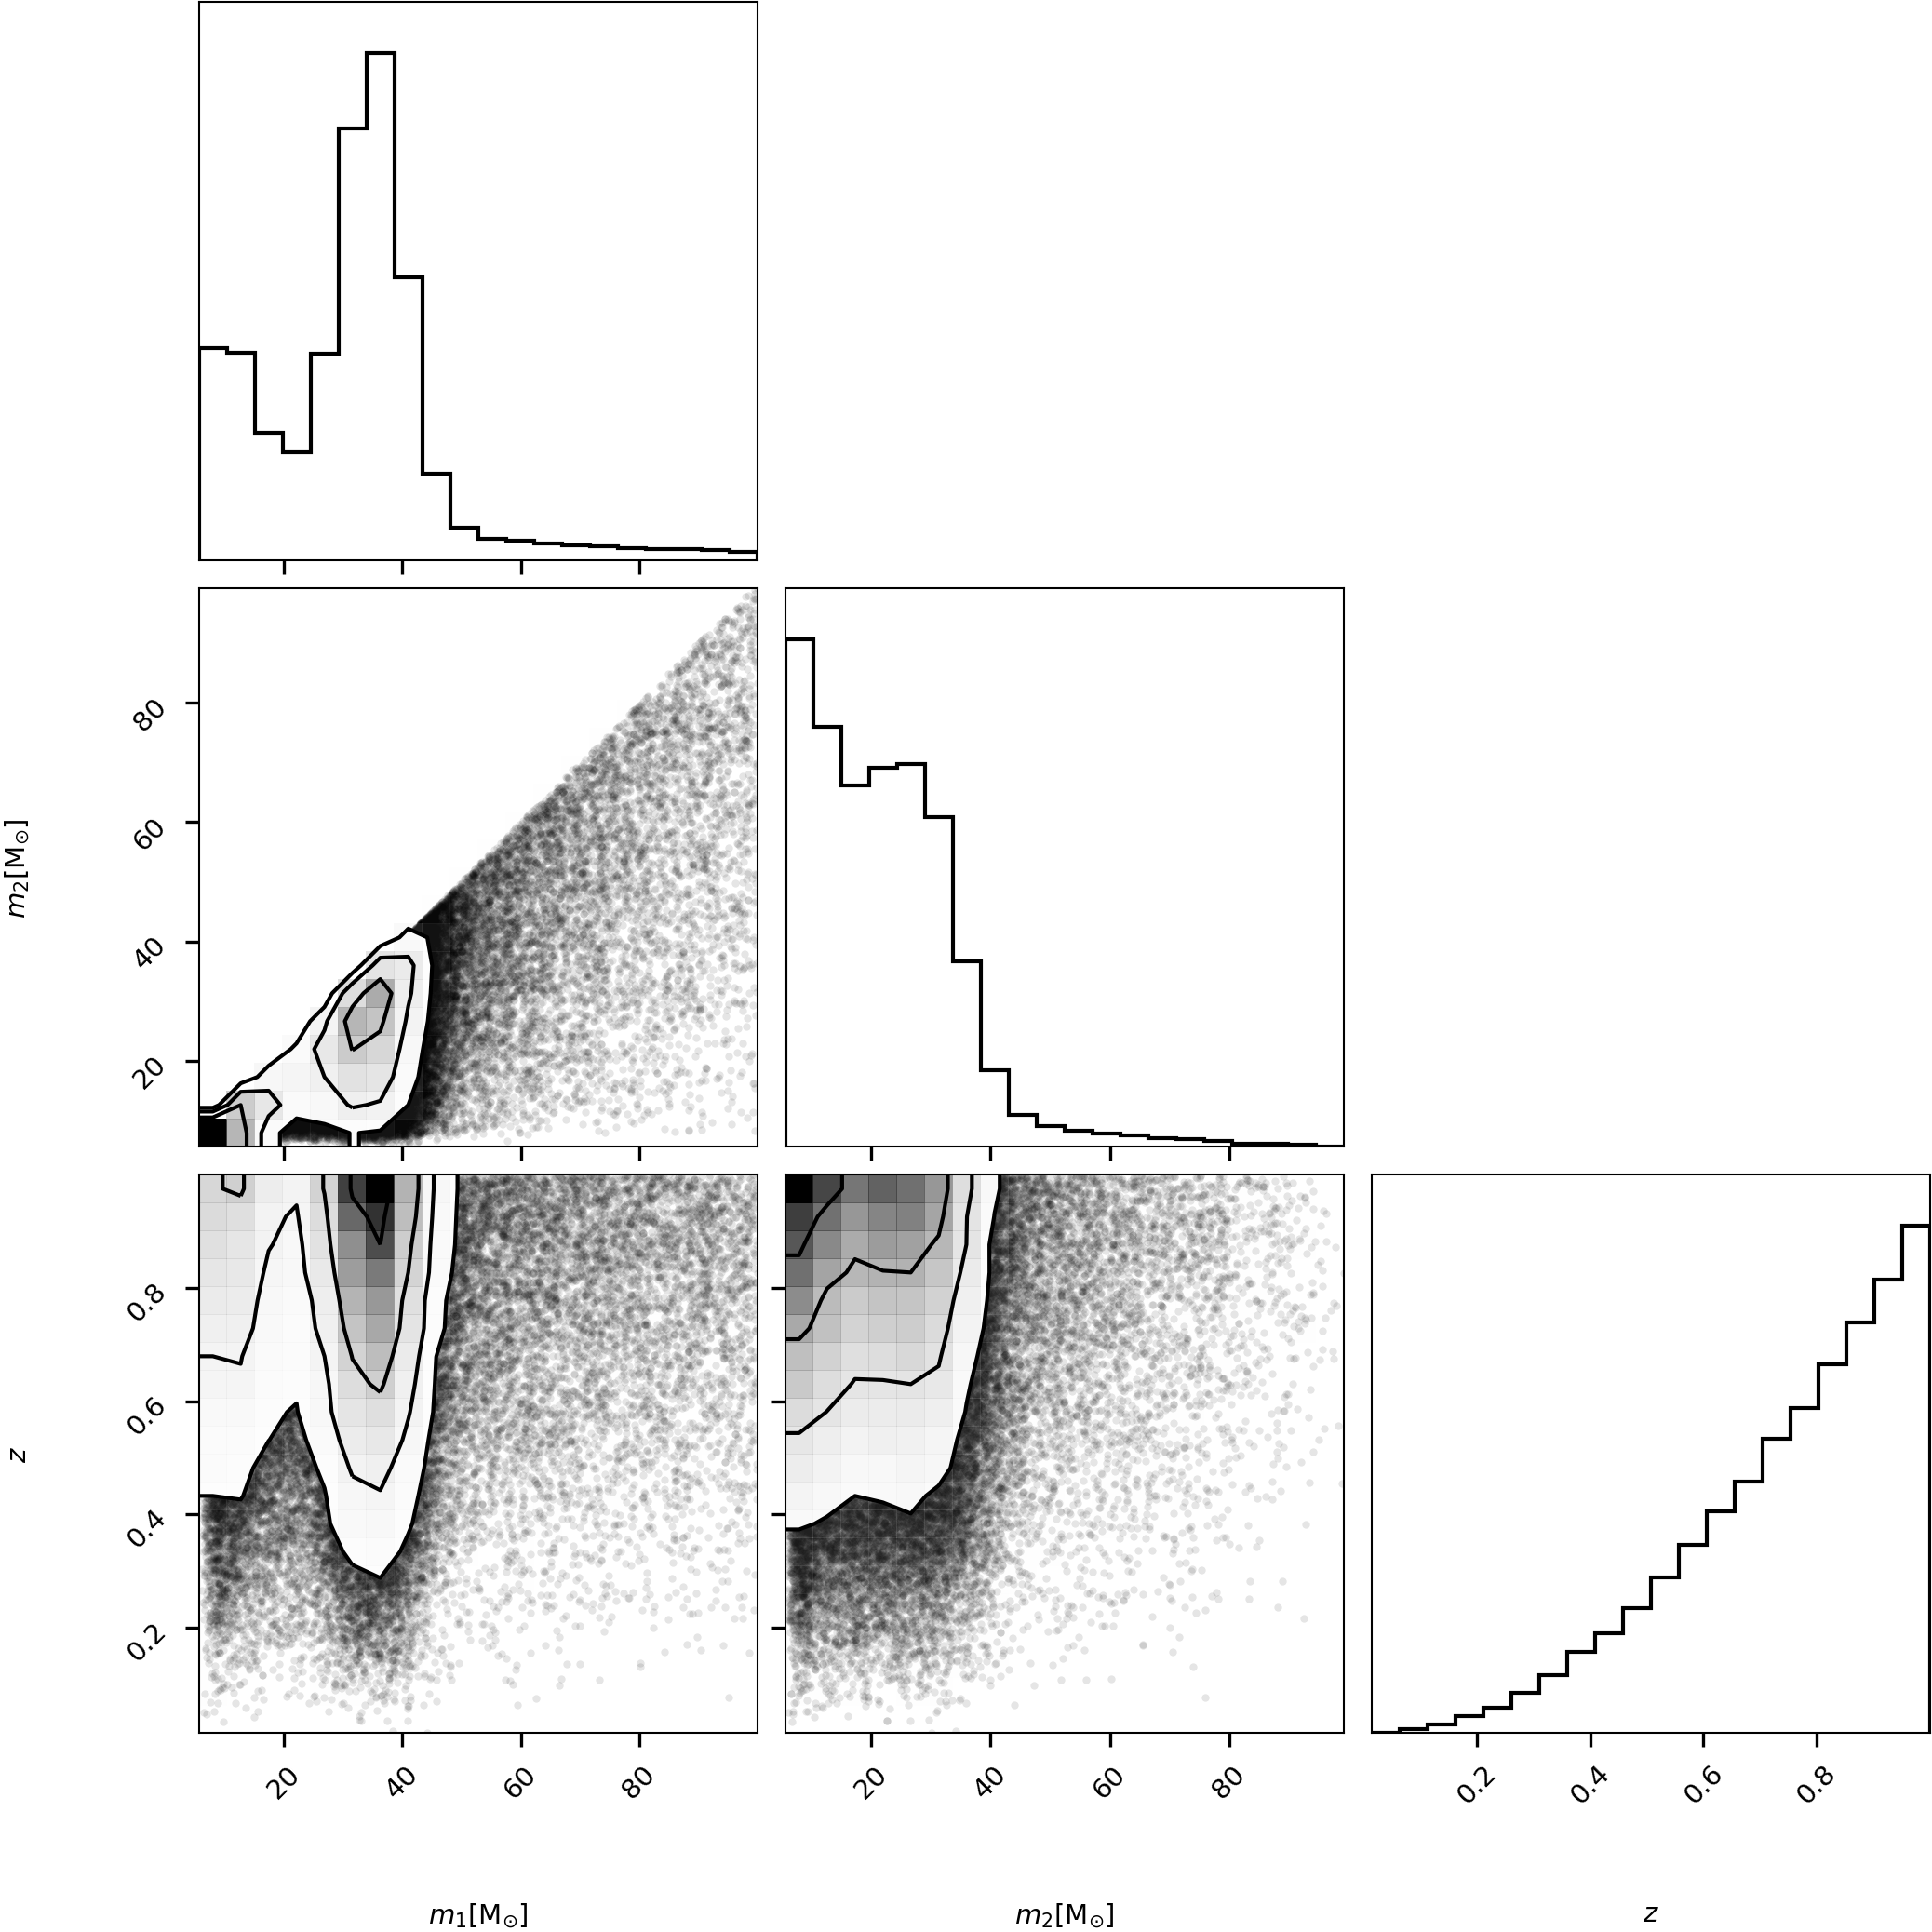

In [15]:
_=pop_0.histogram_astrophysical_population()

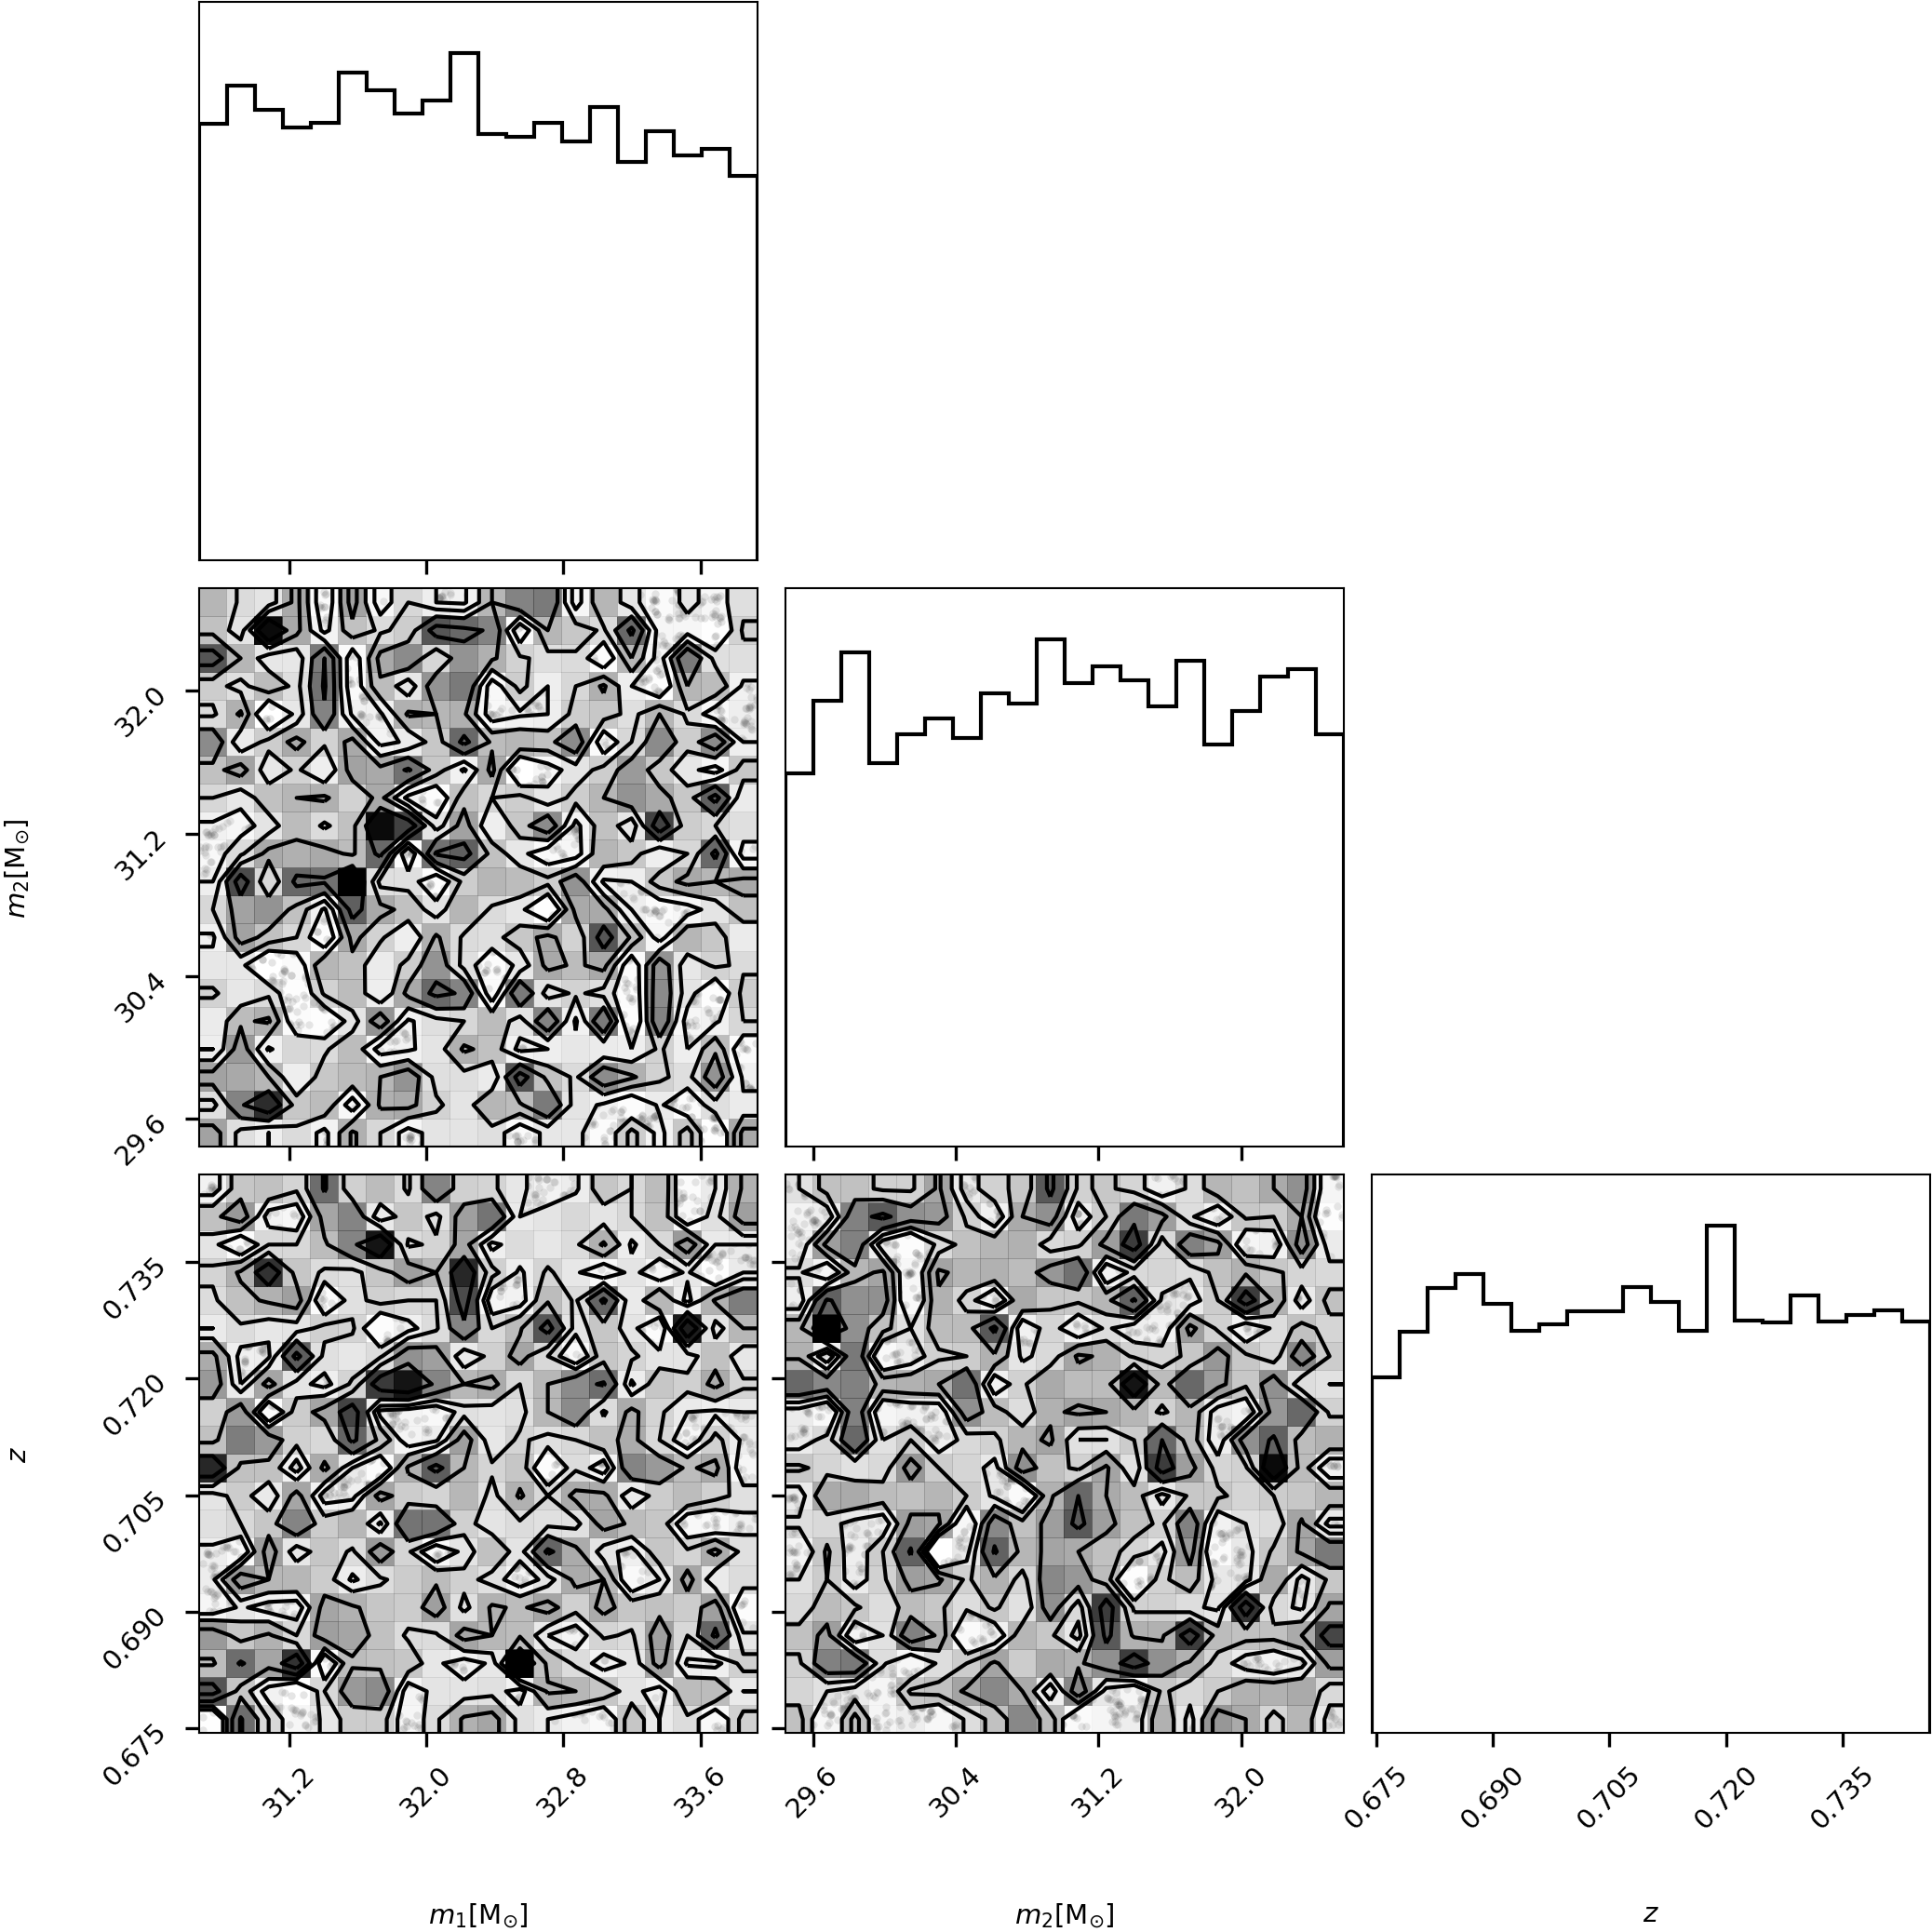

In [16]:
_=pos_dict['GW_10'].histogram_kernel()

In [17]:
mixt.loglij

array([[ -6.37746872,  -5.34420426],
       [ -7.09891149,  -6.14303268],
       [-10.19407437, -17.01417076],
       [ -6.61270851,         -inf],
       [ -6.80304994,  -5.64429314],
       [ -5.37400001,  -5.91493874],
       [ -5.15750572, -49.93109828],
       [ -7.54799924,  -4.4778238 ],
       [ -4.89713694,  -6.57812183],
       [ -8.30939983,  -9.35306243],
       [ -9.47628279,  -5.26447643],
       [-11.57341526,  -7.45104211],
       [-14.65083139, -12.47154666],
       [ -7.59134772,  -4.76199177],
       [ -3.22415808,         -inf],
       [ -3.13755874,         -inf],
       [-11.45943224, -11.86157092],
       [ -5.60472696, -14.66764297],
       [ -6.24189302,  -4.88555329],
       [ -4.98372817,  -5.04263368],
       [-54.93272481,         -inf],
       [ -6.43527237,  -6.12534754],
       [ -6.34912427,  -7.82000174],
       [ -5.04012221,  -5.64440166],
       [ -9.92692377,  -7.2376237 ],
       [-81.30579055,         -inf],
       [ -7.76326906,  -8.39446869],
 

In [21]:
lambdas=np.linspace(0.1,2,100)
posterior=[]
for ll in lambdas:
    posterior.append(mixt.calculate_log_hierachical_likelihood({'PL':ll,'G':0.0},scale_free=False,prior_mode=1))
posterior=np.array(posterior)

/home/simone/git_repositories/asimovgw/asimovgw/analyses.py:81: RuntimeWarning: divide by zero encountered in log
  new_log_priors=self.logpriors+_np.log(lambdasquare)-_logsumexp(self.logpriors+_np.log(lambdasquare))
/home/simone/git_repositories/asimovgw/asimovgw/analyses.py:82: RuntimeWarning: divide by zero encountered in log
  new_log_priors[_np.log(lambdasquare)==-_np.inf]=-_np.inf
/home/simone/git_repositories/asimovgw/asimovgw/analyses.py:88: RuntimeWarning: divide by zero encountered in log
  logpnew=_logsumexp(_np.log(lambdasquare))+self.logpriors+_np.log(lambdasquare)-_logsumexp(self.logpriors+_np.log(lambdasquare))
/home/simone/git_repositories/asimovgw/asimovgw/analyses.py:89: RuntimeWarning: divide by zero encountered in log
  logpnew[_np.log(lambdasquare)==-_np.inf]=-_np.inf


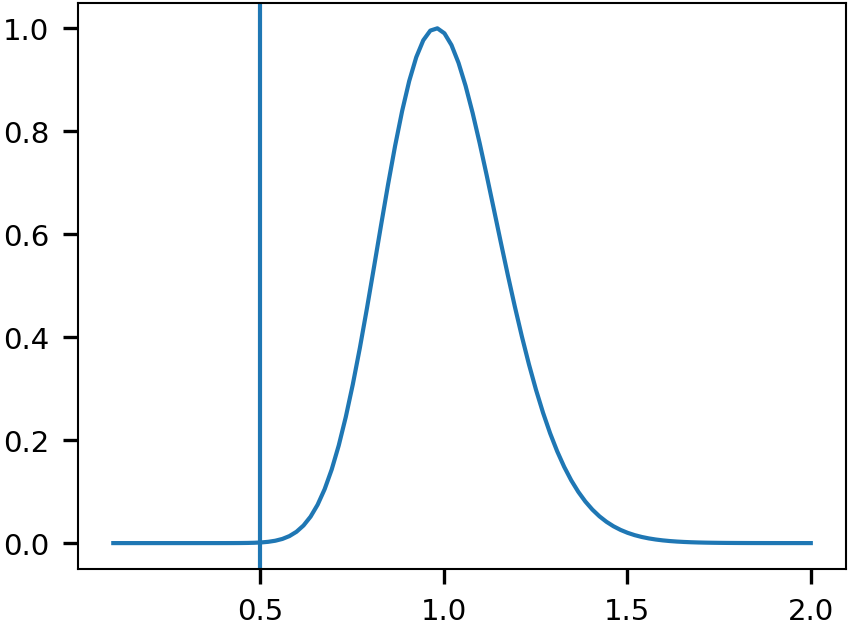

In [22]:
plt.plot(lambdas,np.exp(posterior-posterior.max()))
plt.axvline(0.5)

In [23]:
import icarogw
import numpy as np
import h5py
import matplotlib.pyplot as plt
import asimovgw
from astropy.cosmology import Planck15
import pickle

R0=0.2
Tobs=.1
zcut=3.0
zlim=np.linspace(0,2.5,10000)
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.5})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(100000)
zs=true_redshift_distro.sample(100000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}


pop_0=asimovgw.synthetic_population.synthetic_population('model_0',Ntotal,popbin,prior_to_rem=np.ones(100000),prior_model=1.,Tobs=Tobs)

pop_0.generate_delta_like_injections('./',int(pop_0.expected_detections),sigma={'mass_1_source':0.05,
                                                                               'mass_2_source':0.05,
                                                                               'redshift':0.05})
pos_dict={}
for i in range(int(pop_0.expected_detections)):
    data=pickle.load(open('injection_{:d}.p'.format(i),'rb'))
    GWs=asimovgw.posterior.posterior('GW_'+str(i),data)
    pos_dict['GW_'+str(i)]=GWs

/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:82: RuntimeWarn

In [13]:
Ngen=100000*5
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_0=asimovgw.synthetic_population.synthetic_population('PL',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)


true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':1.0})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_1=asimovgw.synthetic_population.synthetic_population('G',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)



true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':-2.,
                                                                         'beta':1.})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_2=asimovgw.synthetic_population.synthetic_population('PL2',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)



listofpop=asimovgw.synthetic_population.list_of_populations([pop_0,pop_1,pop_2])

/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:552: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:552: RuntimeWarning: divide by zero encountered in log1p


In [14]:
mixt=asimovgw.analyses.mixture_analyis(pos_dict,listofpop)

In [16]:
res=mixt.run_bilby(kernel_kwargs={'kernel_mode':'kde','bw_method':10})

22:17 bilby INFO    : Running for label 'label', output will be saved to 'outdir'
22:17 bilby INFO    : Search parameters:
22:17 bilby INFO    :   theta_i2_1 = absoluteSineNdimensional(i=2, N=3)
22:17 bilby INFO    :   theta_i3_1 = absoluteSineNdimensional(i=3, N=3)
22:17 bilby INFO    : Single likelihood evaluation took 5.723e-04 s


0it [00:00, ?it/s]

22:17 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f15f6f3ec40>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
22:17 bilby INFO    : Checkpoint every check_point_delta_t = 600s
22:17 bilby INFO    : Using dynesty version 1.0.1
22:17 bilby INFO    : Using the bilby-implemented rwalk sam

6195it [03:27, 13.67it/s, bound:436 nc:101 ncall:3.0e+05 eff:2.0% logz=-665.08+/-0.08 dlogz:0.100>0.1] 

22:21 bilby INFO    : Written checkpoint file outdir/label_resume.pickle
22:21 bilby INFO    : Writing 2478 current samples to outdir/label_samples.dat


6196it [03:35, 28.79it/s, bound:436 nc:  1 ncall:3.0e+05 eff:2.4% logz=-664.98+/-0.08 dlogz:0.000>0.1]



22:21 bilby INFO    : Sampling time: 0:03:24.625703
22:21 bilby INFO    : Summary of results:
nsamples: 7196
ln_noise_evidence:    nan
ln_evidence: -664.981 +/-  0.076
ln_bayes_factor:    nan +/-  0.076



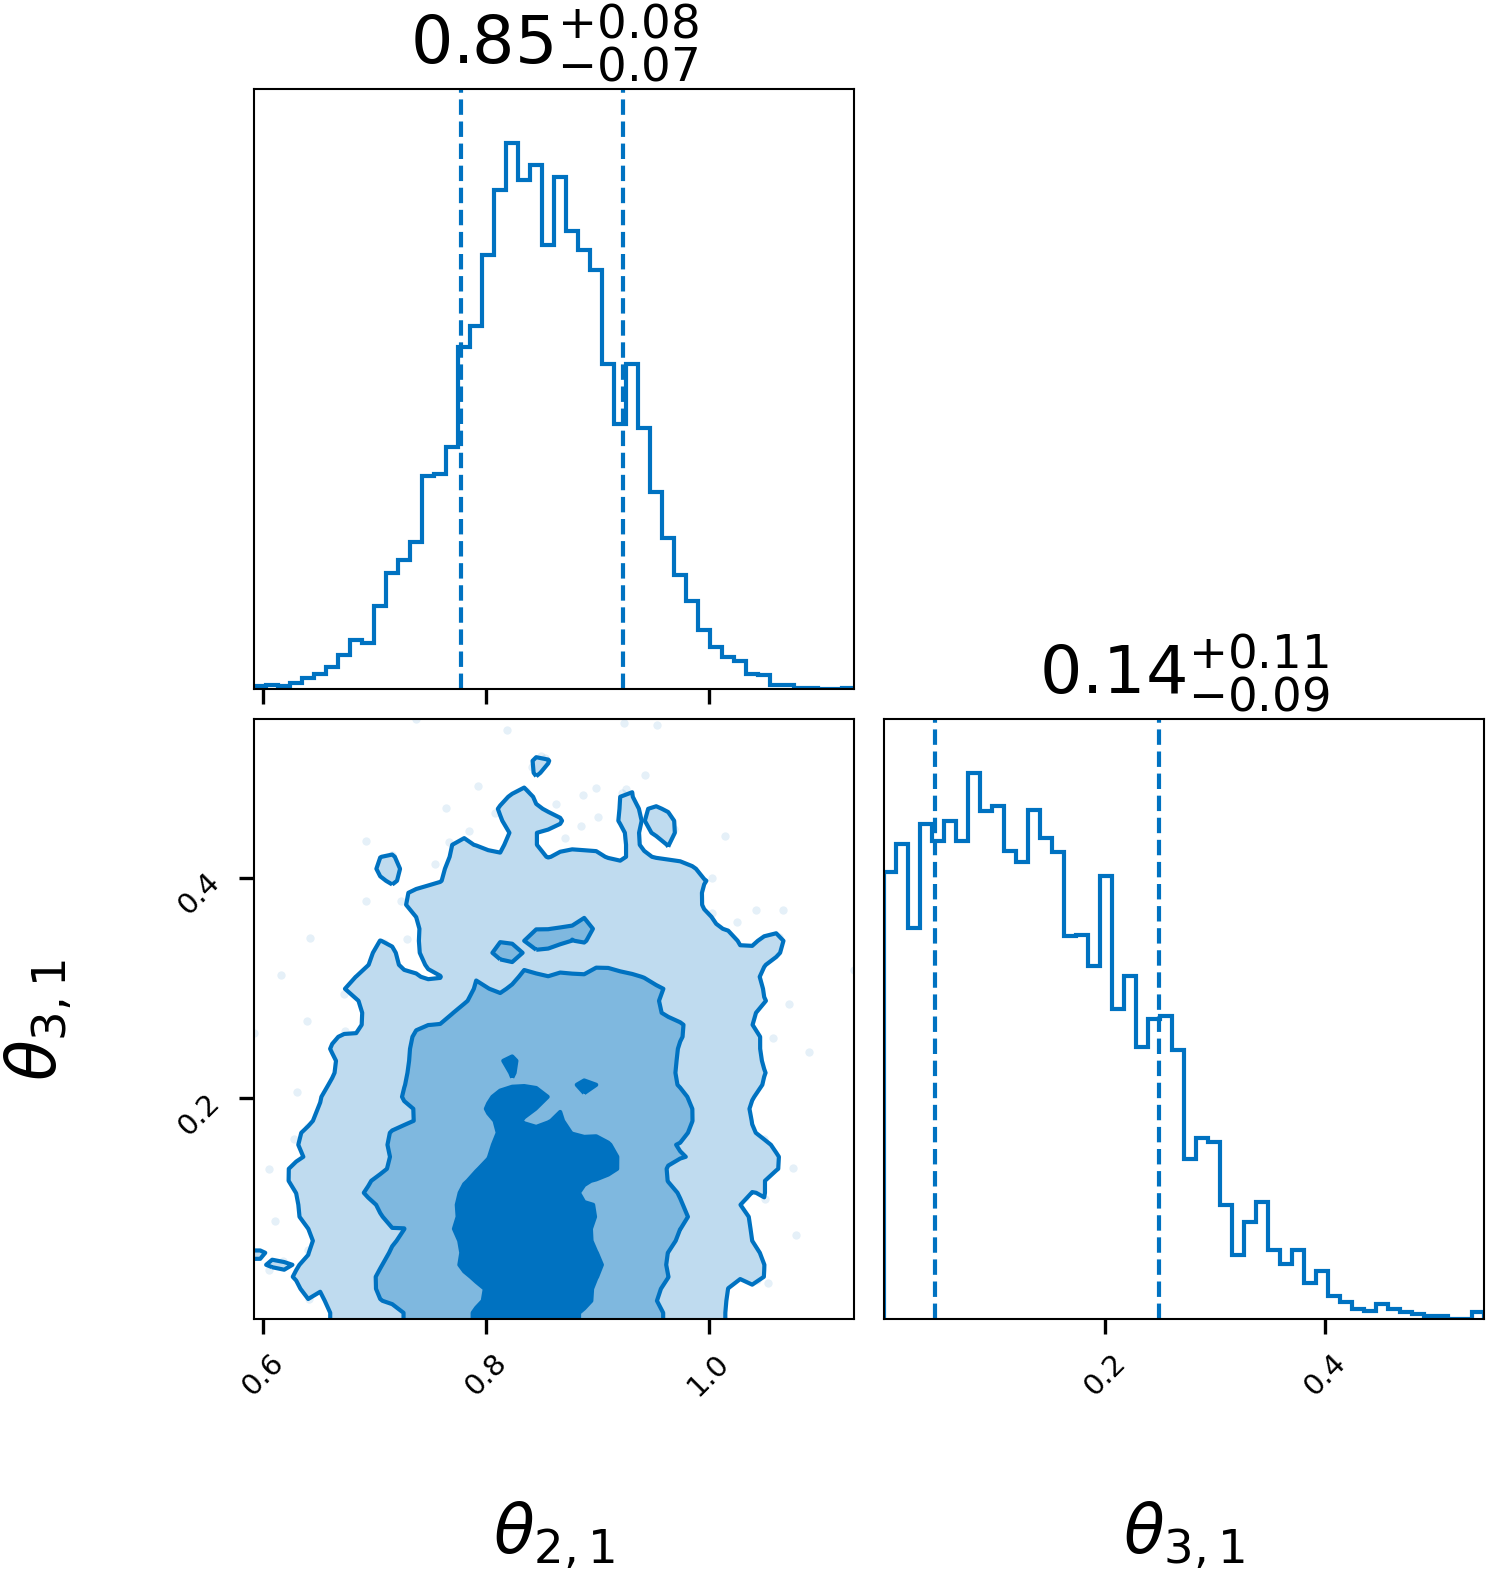

In [17]:
res.plot_corner()

In [18]:
lamb=mixt.isotropic_to_fractions(res)
tt=np.column_stack([lamb[key] for key in lamb.keys()])

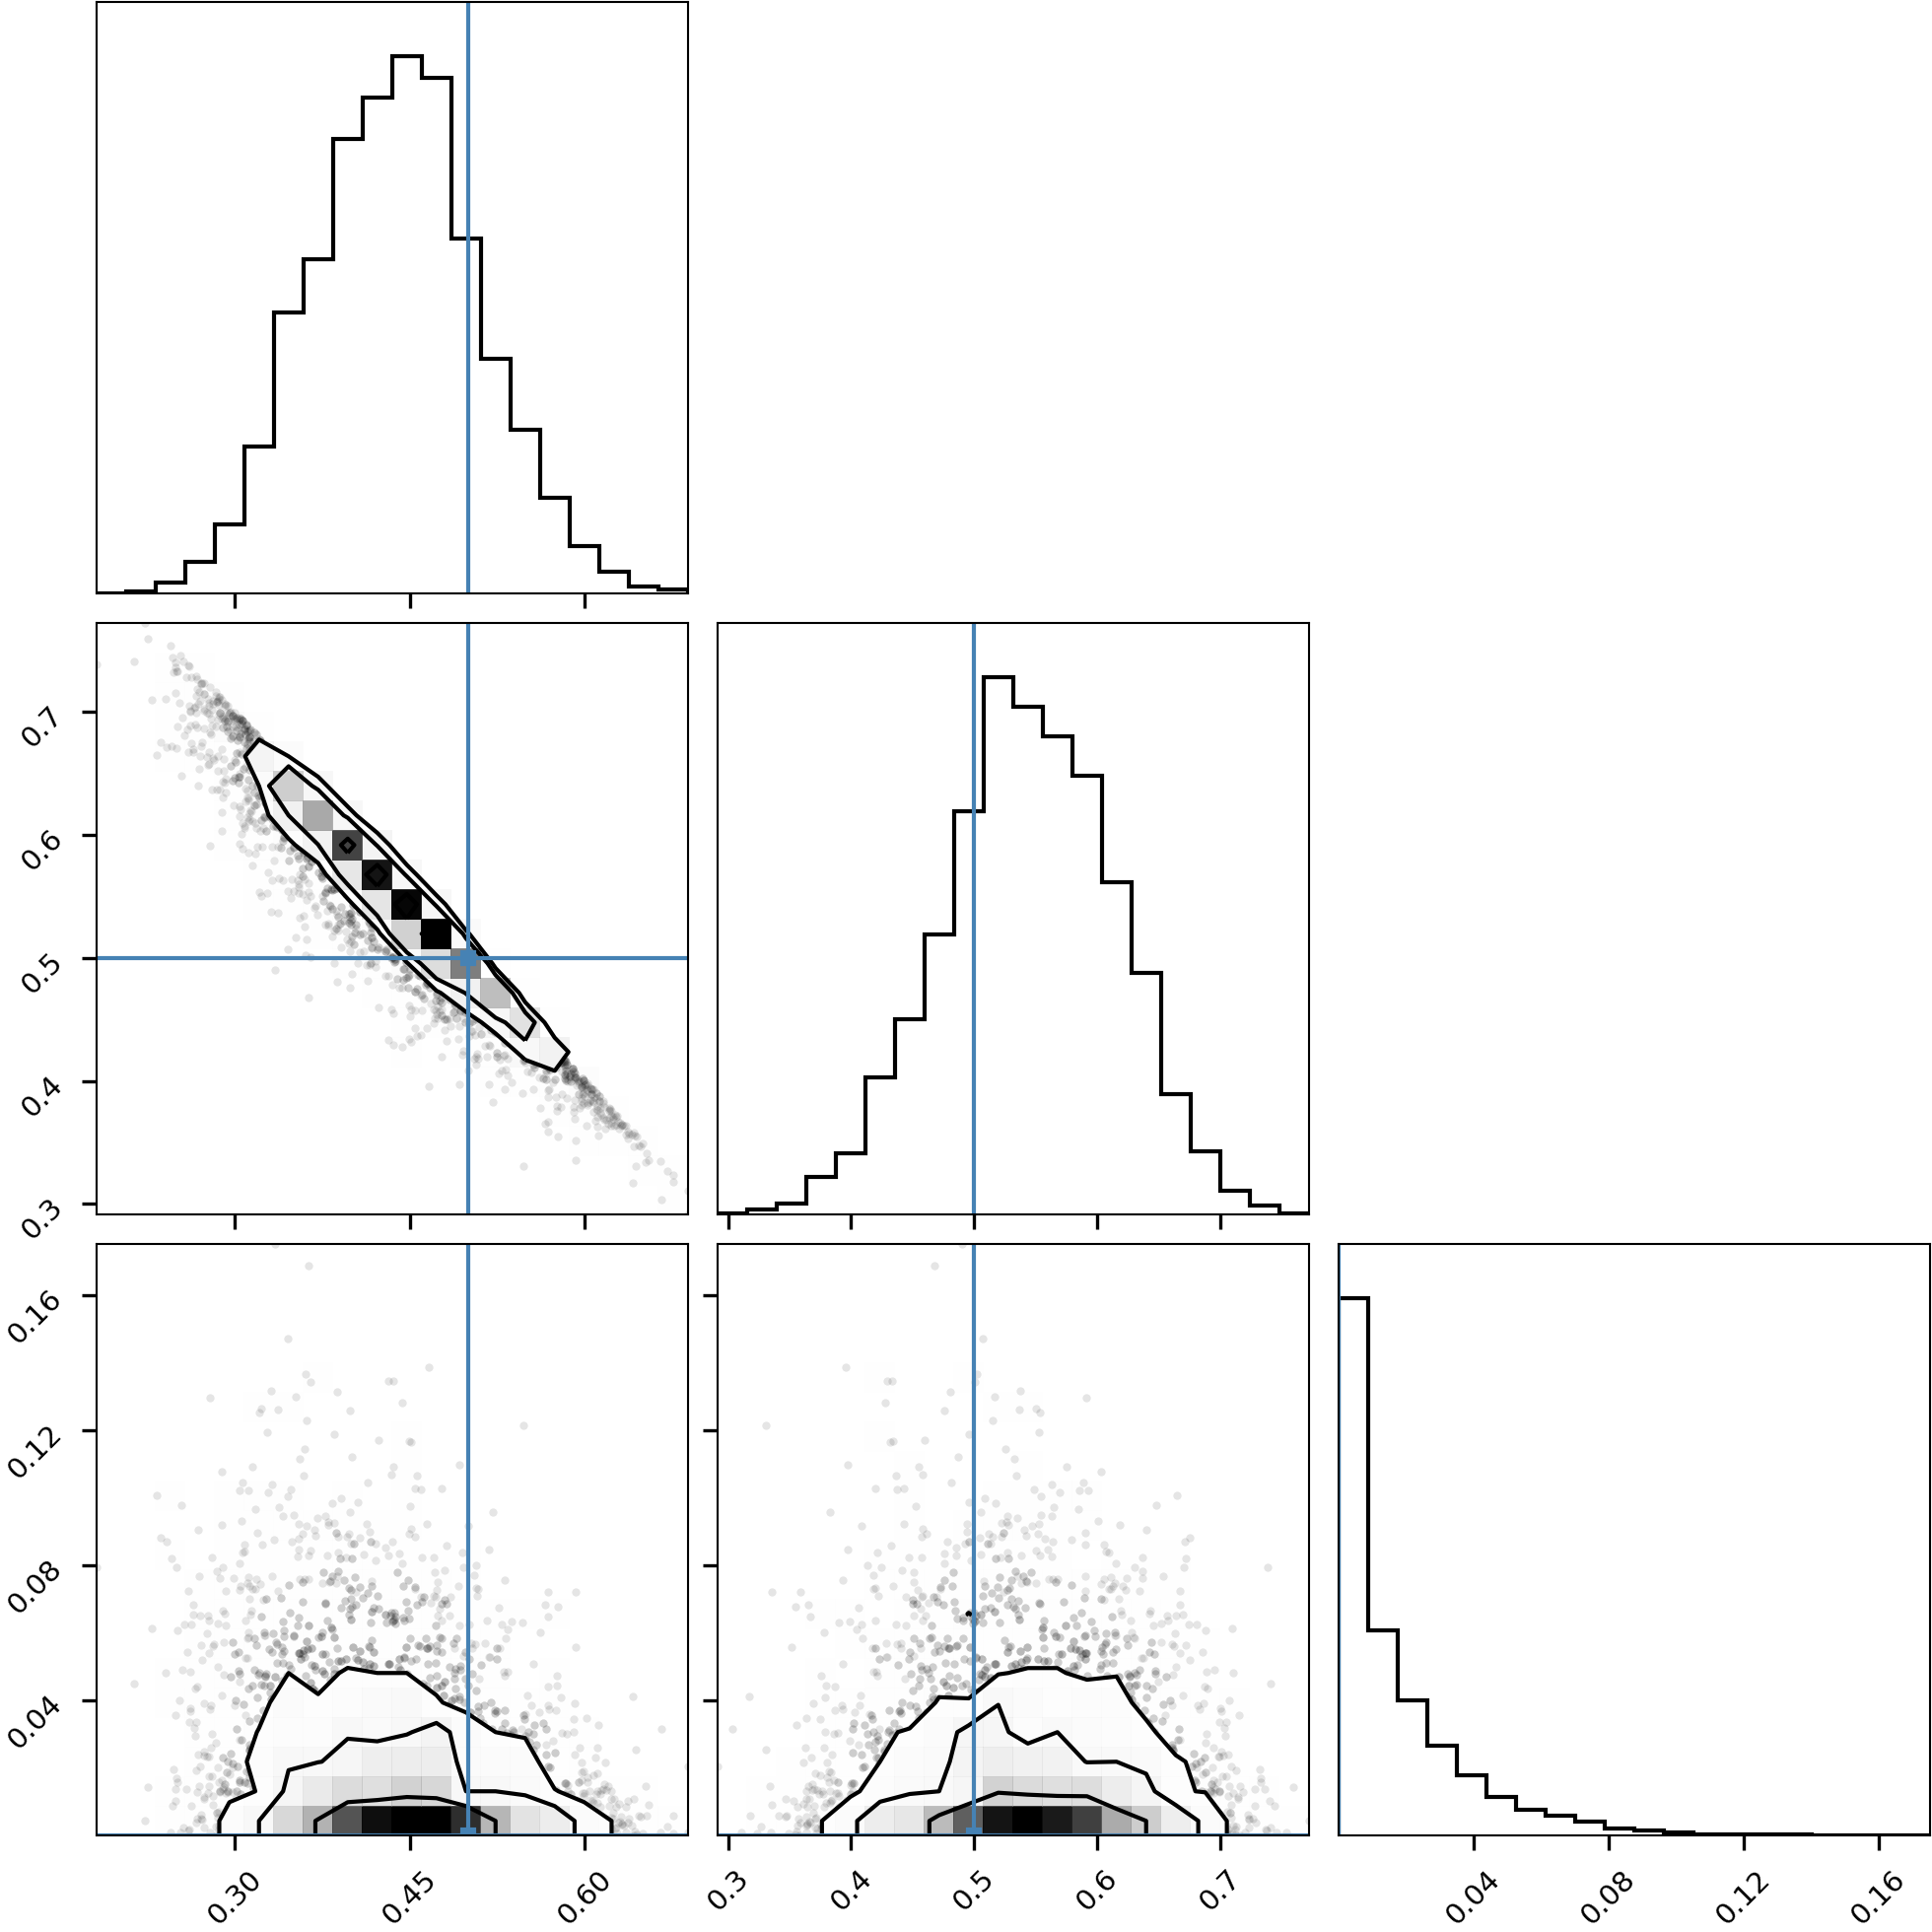

In [19]:
import corner
_=corner.corner(tt,truths=[.5,.5,0.])

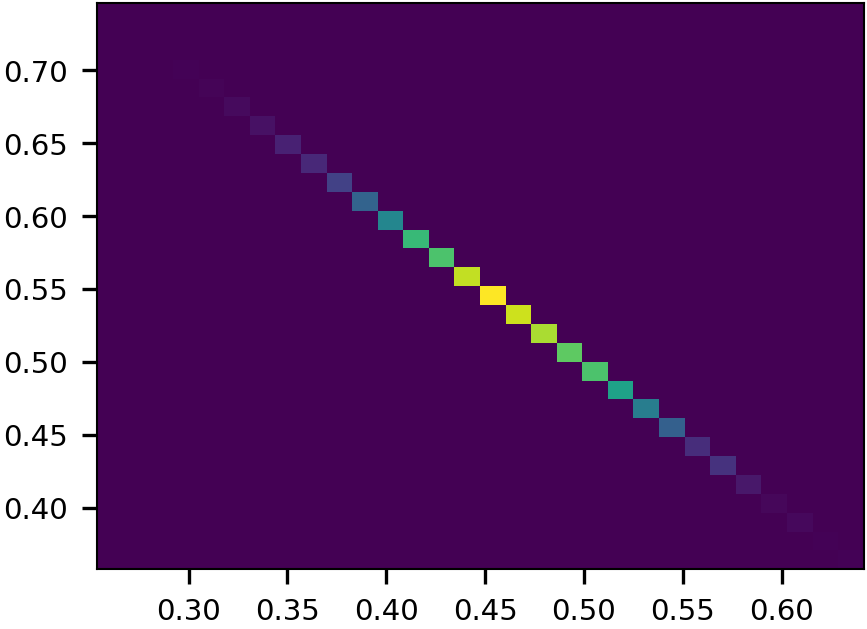

In [35]:
_=plt.hist2d(lamb['PL'],lamb['G'],bins=(30,30))

(array([   2.,   23.,  153.,  601., 1430., 1738., 1264.,  527.,  141.,
          20.]),
 array([0.25363562, 0.29244761, 0.3312596 , 0.37007158, 0.40888357,
        0.44769555, 0.48650754, 0.52531952, 0.56413151, 0.6029435 ,
        0.64175548]),
 <BarContainer object of 10 artists>)

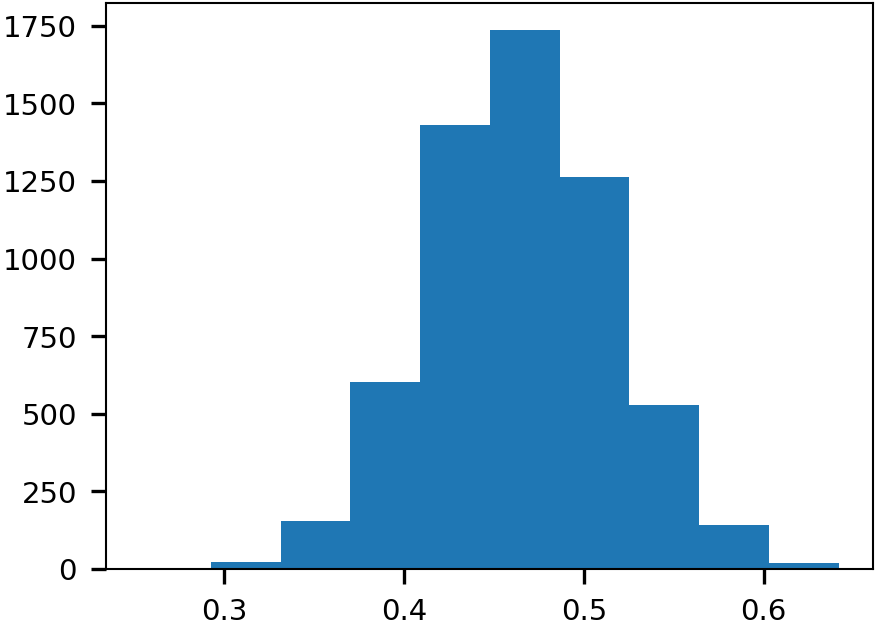

In [36]:
plt.hist(lamb['PL'])

In [1]:
import icarogw
import numpy as np
import h5py
import matplotlib.pyplot as plt
import asimovgw
from astropy.cosmology import Planck15
import pickle

R0=0.2
Tobs=.1
zcut=3.0
zlim=np.linspace(0,2.5,10000)
true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.5})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(100000)
zs=true_redshift_distro.sample(100000)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}


pop_0=asimovgw.synthetic_population.synthetic_population('model_0',Ntotal,popbin,prior_to_rem=np.ones(100000),prior_model=1.,Tobs=Tobs)

pop_0.generate_delta_like_injections('./',int(pop_0.expected_detections),sigma={'mass_1_source':0.05,
                                                                               'mass_2_source':0.05,
                                                                               'redshift':0.05})
pos_dict={}
for i in range(int(pop_0.expected_detections)):
    data=pickle.load(open('injection_{:d}.p'.format(i),'rb'))
    GWs=asimovgw.posterior.posterior('GW_'+str(i),data)
    pos_dict['GW_'+str(i)]=GWs

/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:82: RuntimeWarn

In [2]:
Ngen=100000*5
rue_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':0.5})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_0=asimovgw.synthetic_population.synthetic_population('PL',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)


true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',hyper_params_dict={'mmin':5, 'mmax':100,'alpha':1.5,
                                                                         'beta':1.,'delta_m':5,'mu_g':35,'sigma_g':5,
                                                                         'lambda_peak':1.0})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_1=asimovgw.synthetic_population.synthetic_population('G',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)



true_mass_distro=icarogw.priors.mass.mass_prior('BBH-powerlaw',hyper_params_dict={'mmin':5, 'mmax':40.,'alpha':-2.,
                                                                         'beta':1.})
true_redshift_distro=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=1)
                                                            ,'madau',{'gamma':3.,'zp':2,'kappa':6})
m1s,m2s=true_mass_distro.sample(Ngen)
zs=true_redshift_distro.sample(Ngen)
Ntotal=np.trapz(true_redshift_distro.prob_astro(zlim),zlim)*Tobs*R0

popbin={'mass_1_source':{'values':m1s,'tex_label':r'$m_1 {\rm [M_{\odot}]}$','tex_var':r'm_1'},
        'mass_2_source': {'values':m2s,'tex_label':r'$m_2 {\rm [M_{\odot}}]$','tex_var':r'm_2'},
        'redshift': {'values':zs,'tex_label':r'$z$','tex_var':r'z'}}

pop_2=asimovgw.synthetic_population.synthetic_population('PL2',Ntotal,popbin,prior_to_rem=np.ones(Ngen),prior_model=1.,Tobs=Tobs)



listofpop=asimovgw.synthetic_population.list_of_populations([pop_0,pop_1,pop_2])

/home/simone/anaconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:552: RuntimeWarning: divide by zero encountered in log1p


In [3]:
mixt=asimovgw.analyses.mixture_analyis(pos_dict,listofpop)
import bilby

In [4]:
res=mixt.run_bilby(prior_dict={'PL':bilby.prior.Uniform(0.5,1.5,name='PL'),
                              'G':bilby.prior.Uniform(0.,1.,name='G'),
                              'PL2':bilby.prior.Uniform(0.,0.5,name='PL2')},
                   kernel_kwargs={'kernel_mode':'histogram','bins':(10,10,10)})

/home/simone/git_repositories/asimovgw/asimovgw/posterior.py:89: RuntimeWarning: divide by zero encountered in log
  log_lij=_logsumexp(_np.log(self.kernel[list_of_index])-_np.log(prior_to_rem[idxfinal]))-_np.log(total_samples_j)
23:47 bilby INFO    : Running for label 'label', output will be saved to 'outdir'
23:47 bilby INFO    : Search parameters:
23:47 bilby INFO    :   PL = Uniform(minimum=0.5, maximum=1.5, name='PL', latex_label='PL', unit=None, boundary=None)
23:47 bilby INFO    :   G = Uniform(minimum=0.0, maximum=1.0, name='G', latex_label='G', unit=None, boundary=None)
23:47 bilby INFO    :   PL2 = Uniform(minimum=0.0, maximum=0.5, name='PL2', latex_label='PL2', unit=None, boundary=None)
23:47 bilby INFO    : Single likelihood evaluation took 5.886e-04 s


0it [00:00, ?it/s]

23:47 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f7d24f88550>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
23:47 bilby INFO    : Checkpoint every check_point_delta_t = 600s
23:47 bilby INFO    : Using dynesty version 1.0.1
23:47 bilby INFO    : Using the bilby-implemented rwalk sam

7655it [07:56,  7.05it/s, bound:886 nc:129 ncall:6.3e+05 eff:1.2% logz=-255.18+/-0.08 dlogz:0.100>0.1] 

23:55 bilby INFO    : Written checkpoint file outdir/label_resume.pickle
23:55 bilby INFO    : Writing 3486 current samples to outdir/label_samples.dat


7655it [08:09, 15.65it/s, bound:886 nc:  1 ncall:6.3e+05 eff:1.4% logz=-255.11+/-0.09 dlogz:0.000>0.1]



23:55 bilby INFO    : Sampling time: 0:07:55.688480
23:55 bilby INFO    : Summary of results:
nsamples: 8655
ln_noise_evidence:    nan
ln_evidence: -255.110 +/-  0.088
ln_bayes_factor:    nan +/-  0.088



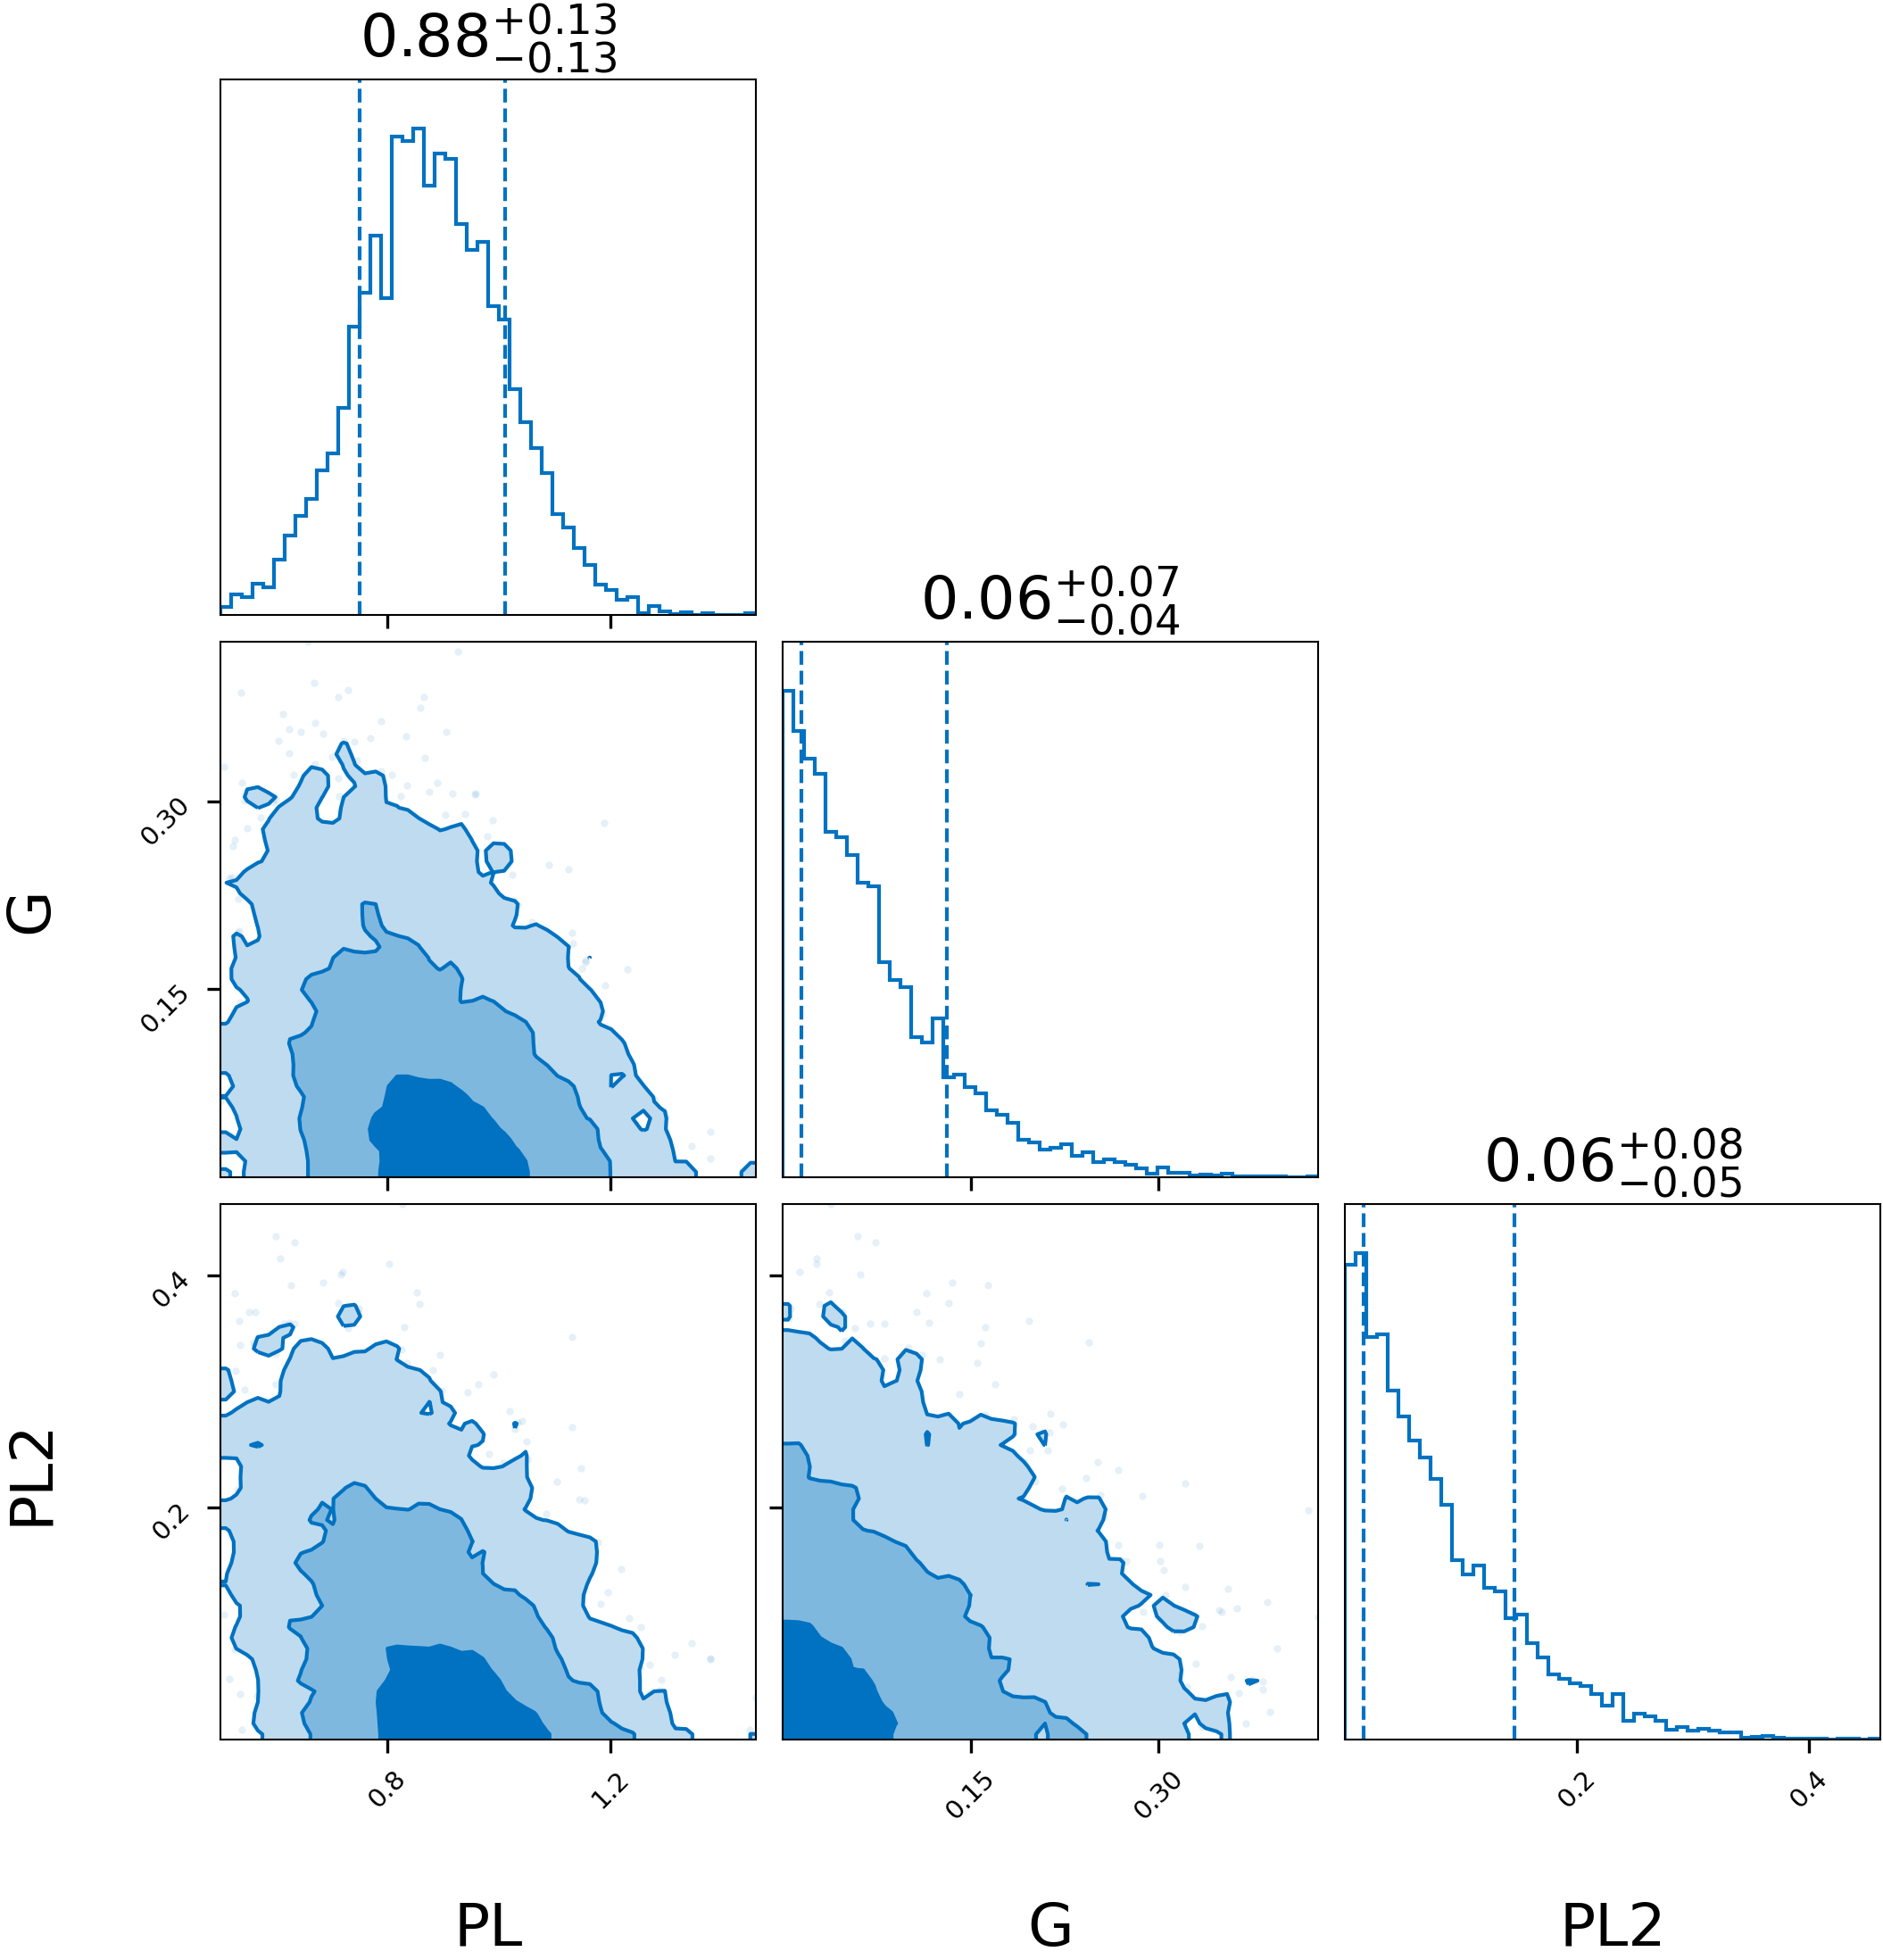

In [5]:
res.plot_corner()